In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import math
from sklearn.metrics import mean_squared_error, r2_score

weather_db = pd.read_csv("Dataset/weather_dataset.csv")
weather_db

Âπ¥   Êúà   Êó•    Áï∂Âú∞Ê∞£Â£ì   Êµ∑Âπ≥Èù¢Ê∞£Â£ì  ÊúÄÂ§ßÈôçÊ∞¥Èáè  ‰∏ÄÂ∞èÊôÇÈôçÊ∞¥Èáè  10ÂàÜÈêòÈôçÊ∞¥Èáè  Âπ≥ÂùáÊ∞£Ê∫´  ÊúÄÈ´òÊ∞£Ê∫´  ÊúÄ‰ΩéÊ∞£Ê∫´  \
0      1961   1   1  1011.7  1012.4    0.0     0.0      0.0   2.1   7.9  -3.9   
1      1961   1   2  1020.2  1021.0    0.0     0.0      0.0   1.5   9.2  -3.3   
2      1961   1   3  1021.3  1022.1    0.1     0.8      0.0   2.5   7.3  -2.4   
3      1961   1   4  1004.6  1005.3   20.2    13.9      3.2   4.7  11.5   0.6   
4      1961   1   5  1016.3  1017.0    0.0     0.0      0.0   3.8   7.7   1.4   
...     ...  ..  ..     ...     ...    ...     ...      ...   ...   ...   ...   
23371  2024  12  27  1006.9  1009.9    0.0     0.0      0.0   7.4  12.7   3.8   
23372  2024  12  28  1008.1  1011.1    0.0     0.0      0.0   5.4  11.5   1.4   
23373  2024  12  29  1013.4  1016.4    0.0     0.0      0.0   6.0  12.3   0.5   
23374  2024  12  30  1017.1  1020.1    0.0     0.0      0.0   6.2  10.3   3.5   
23375  2024  12  31  1003.4  1006.4    0.0     0.0      0.0   8.0  14.6   2.8   

       Âπ≥ÂùáÊøïÂ∫¶  ÊúÄÂ∞èÊøïÂ∫¶  Êó•ÁÖßÊôÇÈñì  ÈñãËä±Êó•  
0      41.0  15.0   8.6    0  
1      51.0  26.0   8.7    0  
2      58.0  37.0   5.4    0  
3      60.0  38.0   1.0    0  
4      33.0  19.0   8.3    0  
...     ...   ...   ...  ...  
23371  51.0  38.0   6.1    0  
23372  59.0  36.0   7.5    0  
23373  54.0  31.0   8.9    0  
23374  53.0  32.0   5.0    0  
23375  55.0  37.0   7.6    0  

[23376 rows x 15 columns]

‰ΩøÁî® Hayashi Á≠â‰∫∫ÊèêÂá∫ÁöÑ‰∏ãÂàóÂÖ¨ÂºèÔºåË®àÁÆóÊØè‰∏ÄÂπ¥ÁöÑ DjÔºå‰πüÂ∞±ÊòØÊ´ªËä±ÂÜ¨Áú†ÁµêÊùüÂà∞ÈñãÂßãÊ∫ñÂÇôÈñãËä±ÁöÑÈÇ£‰∏ÄÂ§©
ÈÄöÂ∏∏Ë®àÁÆó Dj Â§©Êï∏ÁöÑÊó•ÊúüÁÇ∫ 2Êúà1Êó• ÈñãÂßã

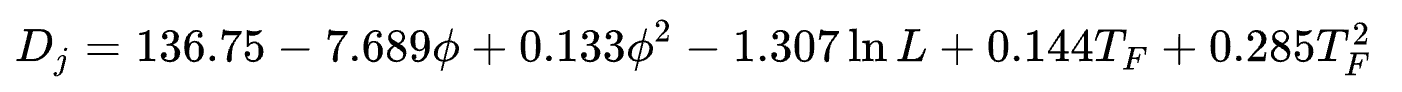

In [4]:
from IPython.display import Image
Image(filename='Image/Dj Formula.png')

    ‚Ä¢\phiÔºöÁ∑ØÂ∫¶Ôºà‰ª•ÂçÅÈÄ≤‰ΩçË°®Á§∫ÔºåÊù±‰∫¨ÊòØ 35^\circ40{\prime} = 35.6667Ôºâ
	‚Ä¢LÔºöË∑ùÈõ¢Êµ∑Â≤∏ÁöÑË∑ùÈõ¢ÔºåÊù±‰∫¨ÁÇ∫ 4km
	‚Ä¢T_FÔºöË©≤Âπ¥ 1ÔΩû3 ÊúàÁöÑÂπ≥ÂùáÊ∞£Ê∫´Ôºà‰ΩøÁî® Âπ≥ÂùáÊ∞£Ê∫´ Ê¨Ñ‰ΩçÔºâ

In [6]:
import math

# Ë®≠ÂÆöÂõ∫ÂÆöÂèÉÊï∏
phi = 35 + 40 / 60  # Á∑ØÂ∫¶Ôºö35Â∫¶40ÂàÜ -> ÂçÅÈÄ≤‰ΩçË°®Á§∫
L = 4  # Êµ∑Â≤∏Ë∑ùÈõ¢ÔºàÂÖ¨ÈáåÔºâ

### Ë®àÁÆóÊåáÂÆöÂπ¥‰ªΩÁöÑTFÔºà1ÔΩû3ÊúàÂπ≥ÂùáÊ∞£Ê∫´Ôºâ -> ‰ª•1961ÁÇ∫‰æã

In [8]:
# Ë®àÁÆóÊåáÂÆöÂπ¥‰ªΩÁöÑTFÔºà1ÔΩû3ÊúàÂπ≥ÂùáÊ∞£Ê∫´Ôºâ -> ‰ª•1961ÁÇ∫‰æã
averageT_1961 = weather_db[weather_db["Âπ¥"] == 1961]
averageT_1961

Âπ¥   Êúà   Êó•    Áï∂Âú∞Ê∞£Â£ì   Êµ∑Âπ≥Èù¢Ê∞£Â£ì  ÊúÄÂ§ßÈôçÊ∞¥Èáè  ‰∏ÄÂ∞èÊôÇÈôçÊ∞¥Èáè  10ÂàÜÈêòÈôçÊ∞¥Èáè  Âπ≥ÂùáÊ∞£Ê∫´  ÊúÄÈ´òÊ∞£Ê∫´  ÊúÄ‰ΩéÊ∞£Ê∫´  \
0    1961   1   1  1011.7  1012.4    0.0     0.0      0.0   2.1   7.9  -3.9   
1    1961   1   2  1020.2  1021.0    0.0     0.0      0.0   1.5   9.2  -3.3   
2    1961   1   3  1021.3  1022.1    0.1     0.8      0.0   2.5   7.3  -2.4   
3    1961   1   4  1004.6  1005.3   20.2    13.9      3.2   4.7  11.5   0.6   
4    1961   1   5  1016.3  1017.0    0.0     0.0      0.0   3.8   7.7   1.4   
..    ...  ..  ..     ...     ...    ...     ...      ...   ...   ...   ...   
360  1961  12  27  1008.3  1009.0    0.0     0.0      0.0   4.4  11.3  -1.3   
361  1961  12  28  1007.2  1007.9    0.0     0.0      0.0   4.0  11.2  -1.9   
362  1961  12  29  1009.3  1009.9    0.0     0.0      0.0   4.8  11.7  -1.1   
363  1961  12  30  1014.5  1015.3    0.0     0.0      0.0   4.3  10.2  -0.8   
364  1961  12  31  1019.2  1020.0    0.0     0.0      0.0   4.8  10.7   0.1   

     Âπ≥ÂùáÊøïÂ∫¶  ÊúÄÂ∞èÊøïÂ∫¶  Êó•ÁÖßÊôÇÈñì  ÈñãËä±Êó•  
0    41.0  15.0   8.6    0  
1    51.0  26.0   8.7    0  
2    58.0  37.0   5.4    0  
3    60.0  38.0   1.0    0  
4    33.0  19.0   8.3    0  
..    ...   ...   ...  ...  
360  38.0  16.0   8.3    0  
361  38.0  18.0   8.7    0  
362  45.0  24.0   7.7    0  
363  52.0  28.0   7.8    0  
364  46.0  26.0   8.4    0  

[365 rows x 15 columns]

In [9]:
averageT_jan_to_mar = averageT_1961[averageT_1961["Êúà"].isin([1, 2, 3])]
averageT_jan_to_mar

Âπ¥  Êúà   Êó•    Áï∂Âú∞Ê∞£Â£ì   Êµ∑Âπ≥Èù¢Ê∞£Â£ì  ÊúÄÂ§ßÈôçÊ∞¥Èáè  ‰∏ÄÂ∞èÊôÇÈôçÊ∞¥Èáè  10ÂàÜÈêòÈôçÊ∞¥Èáè  Âπ≥ÂùáÊ∞£Ê∫´  ÊúÄÈ´òÊ∞£Ê∫´  ÊúÄ‰ΩéÊ∞£Ê∫´  \
0   1961  1   1  1011.7  1012.4    0.0     0.0      0.0   2.1   7.9  -3.9   
1   1961  1   2  1020.2  1021.0    0.0     0.0      0.0   1.5   9.2  -3.3   
2   1961  1   3  1021.3  1022.1    0.1     0.8      0.0   2.5   7.3  -2.4   
3   1961  1   4  1004.6  1005.3   20.2    13.9      3.2   4.7  11.5   0.6   
4   1961  1   5  1016.3  1017.0    0.0     0.0      0.0   3.8   7.7   1.4   
..   ... ..  ..     ...     ...    ...     ...      ...   ...   ...   ...   
85  1961  3  27  1007.1  1007.8    3.2     1.3      0.3   3.2   5.5   0.6   
86  1961  3  28  1013.7  1014.3    0.0     0.0      0.0   7.8  14.9   0.9   
87  1961  3  29  1023.2  1023.9    0.0     0.0      0.0   9.2  15.5   2.9   
88  1961  3  30  1016.7  1017.4    0.0     0.0      0.0  13.8  21.9   5.2   
89  1961  3  31  1013.9  1014.5    0.0     0.0      0.0  12.9  18.3   6.8   

    Âπ≥ÂùáÊøïÂ∫¶  ÊúÄÂ∞èÊøïÂ∫¶  Êó•ÁÖßÊôÇÈñì  ÈñãËä±Êó•  
0   41.0  15.0   8.6    0  
1   51.0  26.0   8.7    0  
2   58.0  37.0   5.4    0  
3   60.0  38.0   1.0    0  
4   33.0  19.0   8.3    0  
..   ...   ...   ...  ...  
85  83.0  69.0   0.0    0  
86  51.0  28.0  10.7    0  
87  56.0  31.0   9.9    0  
88  58.0  27.0  10.0    0  
89  60.0  46.0  11.1    0  

[90 rows x 15 columns]

In [10]:
averageT_1961_jan_to_mar = averageT_jan_to_mar["Âπ≥ÂùáÊ∞£Ê∫´"].mean()
averageT_1961_jan_to_mar

np.float64(5.471111111111112)

### Ë®àÁÆó 1961Âπ¥Âæû1Êúà1Êó•Ëµ∑ÔºåÂÜ¨Áú†ÁµêÊùüÊâÄÈúÄË¶ÅÁöÑÊó•Êï∏

In [12]:
# Â•óÁî®ÂÖ¨ÂºèË®àÁÆó Dj
Dj = (
    136.75
    - 7.689 * phi
    + 0.133 * phi ** 2
    - 1.307 * np.log(L)
    + 0.144 * averageT_1961_jan_to_mar
    + 0.285 * averageT_1961_jan_to_mar ** 2
)

# ÂõõÊç®‰∫îÂÖ•ÂæåÁÇ∫Áï∂Âπ¥Â∫¶ÁöÑ DjÔºàÂ§ßÁ¥ÑÊòØÂæûÊØèÂπ¥2Êúà1Êó•ÁÆóËµ∑ÁöÑÁ¨¨ÂπæÂ§©Ôºâ
print(f"1961 Âπ¥ÁöÑ Dj ‚âà Á¨¨ {round(Dj)} Â§©")

1961 Âπ¥ÁöÑ Dj ‚âà Á¨¨ 39 Â§©


### Ë®àÁÆóË≥áÊñôÈõÜ‰∏≠ÂÖ®Âπ¥Â∫¶ 1-3 ÊúàÁöÑÂπ≥ÂùáÊ∫´Â∫¶

In [14]:
# ÂÖàÂèñÂæóË≥áÊñô‰∏≠Âá∫ÁèæÈÅéÁöÑÂπ¥‰ªΩ
allyears = weather_db["Âπ¥"].unique()

# Áî®‰æÜÂÑ≤Â≠òÁµêÊûú
dj_days = []

# Â∞çÊØè‰∏ÄÂπ¥ÂÅöË®àÁÆó
for year in allyears:
    # ÁØ©ÈÅ∏Ë©≤Âπ¥‰ªΩÁöÑ1~3ÊúàË≥áÊñô
    subset = weather_db[(weather_db["Âπ¥"] == year) & (weather_db["Êúà"].isin([1, 2, 3]))]
    
    # Ë®àÁÆóÁï∂Âπ¥1~3ÊúàÂπ≥ÂùáÊ∞£Ê∫´
    TF = subset["Âπ≥ÂùáÊ∞£Ê∫´"].mean()
    
    # Â•óÁî®HayashiÂÖ¨ÂºèË®àÁÆóDj
    Dj = (
        136.75
        - 7.689 * phi
        + 0.133 * phi ** 2
        - 1.307 * np.log(L)
        + 0.144 * TF
        + 0.285 * TF ** 2
    )
    # Â≠òÊàê‰∏ÄÁ≠Ü tupleÔºåÊîæÈÄ≤ list
    dj_days.append((year, round(Dj)))

# ËΩâÊàê DataFrame
allyears_dj_days = pd.DataFrame(dj_days, columns=["Âπ¥", "Dj"])

# È°ØÁ§∫ÂâçÂπæÁ≠Ü
print(allyears_dj_days)

       Âπ¥  Dj
0   1961  39
1   1962  42
2   1963  38
3   1964  40
4   1965  39
..   ...  ..
59  2020  53
60  2021  54
61  2022  45
62  2023  53
63  2024  50

[64 rows x 2 columns]


### Â∞áË≥áÊñôÈõÜÂÖ®Âπ¥Â∫¶ÁöÑÂÜ¨Áú†ÊâÄÈúÄÊó•Êï∏Ë≥áÊñôË¶ñË¶∫Âåñ

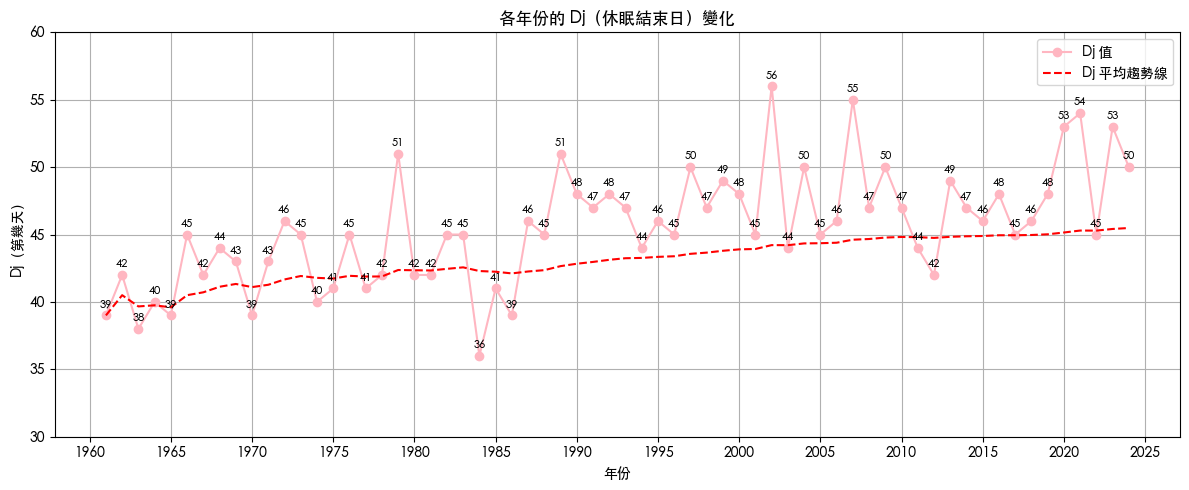

In [16]:
# Ë®àÁÆóÈÄêÂπ¥Á¥ØÁ©çÂπ≥Âùá Dj ‰ΩúÁÇ∫Ë∂®Âã¢Á∑ö
alltears_dj_days_avg = [allyears_dj_days["Dj"][:i+1].mean() for i in range(len(allyears_dj_days))]

plt.rcParams['font.family'] = 'Heiti TC'

# Áπ™Ë£ΩÊäòÁ∑öÂúñ
plt.figure(figsize=(12, 5))
plt.plot(allyears_dj_days["Âπ¥"], allyears_dj_days["Dj"], marker='o', linestyle='-', color='lightpink', label='Dj ÂÄº')
plt.plot(allyears_dj_days["Âπ¥"], alltears_dj_days_avg, '--r', label='Dj Âπ≥ÂùáË∂®Âã¢Á∑ö')  
plt.title("ÂêÑÂπ¥‰ªΩÁöÑ DjÔºà‰ºëÁú†ÁµêÊùüÊó•ÔºâËÆäÂåñ")
plt.xlabel("Âπ¥‰ªΩ")
plt.ylabel("DjÔºàÁ¨¨ÂπæÂ§©Ôºâ")
plt.grid(True)

for x, y in zip(allyears_dj_days['Âπ¥'], allyears_dj_days["Dj"]):
    plt.text(x, y + 0.5, str(int(y)), ha='center', fontsize=8)  # y+0.5 ËÆìÊñáÂ≠óÊµÆÂú®Èªû‰∏äÊñπ‰∏ÄÈªû

plt.legend()
plt.xticks(np.arange(1960, 2026, 5))
plt.yticks(np.arange(30, 65, 5))
plt.tight_layout()
plt.savefig('ÂêÑÂπ¥‰ªΩÁöÑ Dj ËÆäÂåñ', dpi=300, bbox_inches='tight')
plt.show()

### Ë®àÁÆóË®ìÁ∑¥ÈõÜÂπ¥Â∫¶ÁöÑÂÜ¨Áú†ÊâÄÈúÄÊó•Êï∏ÔºàDjÔºâ

In [18]:
train = pd.read_csv("Dataset/train.csv")
train

Âπ¥   Êúà   Êó•    Áï∂Âú∞Ê∞£Â£ì   Êµ∑Âπ≥Èù¢Ê∞£Â£ì  ÊúÄÂ§ßÈôçÊ∞¥Èáè  ‰∏ÄÂ∞èÊôÇÈôçÊ∞¥Èáè  10ÂàÜÈêòÈôçÊ∞¥Èáè  Âπ≥ÂùáÊ∞£Ê∫´  ÊúÄÈ´òÊ∞£Ê∫´  ÊúÄ‰ΩéÊ∞£Ê∫´  \
0      1961   1   1  1011.7  1012.4    0.0     0.0      0.0   2.1   7.9  -3.9   
1      1961   1   2  1020.2  1021.0    0.0     0.0      0.0   1.5   9.2  -3.3   
2      1961   1   3  1021.3  1022.1    0.1     0.8      0.0   2.5   7.3  -2.4   
3      1961   1   4  1004.6  1005.3   20.2    13.9      3.2   4.7  11.5   0.6   
4      1961   1   5  1016.3  1017.0    0.0     0.0      0.0   3.8   7.7   1.4   
...     ...  ..  ..     ...     ...    ...     ...      ...   ...   ...   ...   
18622  2011  12  27  1019.5  1024.0    0.0     0.0      0.0   5.2   9.2   1.8   
18623  2011  12  28  1020.6  1025.2    0.0     0.0      0.0   6.2   9.3   3.9   
18624  2011  12  29  1015.1  1019.7    0.0     0.0      0.0   6.0  10.0   2.1   
18625  2011  12  30  1015.4  1019.9    0.0     0.0      0.0   6.2   9.7   3.9   
18626  2011  12  31  1018.8  1023.4    0.0     0.0      0.0   5.6  10.0   1.8   

       Âπ≥ÂùáÊøïÂ∫¶  ÊúÄÂ∞èÊøïÂ∫¶  Êó•ÁÖßÊôÇÈñì  ÈñãËä±Êó•  
0      41.0  15.0   8.6    0  
1      51.0  26.0   8.7    0  
2      58.0  37.0   5.4    0  
3      60.0  38.0   1.0    0  
4      33.0  19.0   8.3    0  
...     ...   ...   ...  ...  
18622  29.0  18.0   9.0    0  
18623  31.0  25.0   7.8    0  
18624  46.0  36.0   8.9    0  
18625  29.0  15.0   9.1    0  
18626  36.0  22.0   6.5    0  

[18627 rows x 15 columns]

In [19]:
# ÂÖàÂèñÂæóË≥áÊñô‰∏≠Âá∫ÁèæÈÅéÁöÑÂπ¥‰ªΩ
train_allyears = train["Âπ¥"].unique()

# Áî®‰æÜÂÑ≤Â≠òÁµêÊûú
train_dj_days = []

# Â∞çÊØè‰∏ÄÂπ¥ÂÅöË®àÁÆó
for year in train_allyears:
    # ÁØ©ÈÅ∏Ë©≤Âπ¥‰ªΩÁöÑ1~3ÊúàË≥áÊñô
    subset = train[(train["Âπ¥"] == year) & (train["Êúà"].isin([1, 2, 3]))]
    
    # Ë®àÁÆóÁï∂Âπ¥1~3ÊúàÂπ≥ÂùáÊ∞£Ê∫´
    TF = subset["Âπ≥ÂùáÊ∞£Ê∫´"].mean()
    
    # Â•óÁî® Hayashi ÂÖ¨ÂºèË®àÁÆó Dj
    Dj = (
        136.75
        - 7.689 * phi
        + 0.133 * phi ** 2
        - 1.307 * np.log(L)
        + 0.144 * TF
        + 0.285 * TF ** 2
    )
    # Â≠òÊàê‰∏ÄÁ≠Ü tupleÔºåÊîæÈÄ≤ list
    train_dj_days.append((year, round(Dj)))

# ËΩâÊàê DataFrame
train_allyears_dj_days = pd.DataFrame(train_dj_days, columns=["Âπ¥", "Dj"])

print(f'DjÊúÄÂ§ßÂÄºÔºö{max(train_allyears_dj_days["Dj"])}')
print(f'DjÊúÄÂ∞èÂÄºÔºö{min(train_allyears_dj_days["Dj"])}')
print(f'ÊâÄ‰ª•Ê´ªËä±ÂÜ¨Áú†Êó•ÊúÉËêΩÂú®{max(train_allyears_dj_days["Dj"])}~{min(train_allyears_dj_days["Dj"])}Êó•ÁöÑÂçÄÈñìÔºå‰πüÂ∞±ÊòØ2Êúà‰ªΩÂà∞3Êúà‰πãÈñì')
print()
print(train_allyears_dj_days)

DjÊúÄÂ§ßÂÄºÔºö56
DjÊúÄÂ∞èÂÄºÔºö36
ÊâÄ‰ª•Ê´ªËä±ÂÜ¨Áú†Êó•ÊúÉËêΩÂú®56~36Êó•ÁöÑÂçÄÈñìÔºå‰πüÂ∞±ÊòØ2Êúà‰ªΩÂà∞3Êúà‰πãÈñì

       Âπ¥  Dj
0   1961  39
1   1962  42
2   1963  38
3   1964  40
4   1965  39
5   1966  45
6   1967  42
7   1968  44
8   1969  43
9   1970  39
10  1971  43
11  1972  46
12  1973  45
13  1974  40
14  1975  41
15  1976  45
16  1977  41
17  1978  42
18  1979  51
19  1980  42
20  1981  42
21  1982  45
22  1983  45
23  1984  36
24  1985  41
25  1986  39
26  1987  46
27  1988  45
28  1989  51
29  1990  48
30  1991  47
31  1992  48
32  1993  47
33  1994  44
34  1995  46
35  1996  45
36  1997  50
37  1998  47
38  1999  49
39  2000  48
40  2001  45
41  2002  56
42  2003  44
43  2004  50
44  2005  45
45  2006  46
46  2007  55
47  2008  47
48  2009  50
49  2010  47
50  2011  44


In [20]:
# Êñ∞Â¢û‰∏ÄÂÄãÊ¨Ñ‰ΩçÔºåÂ≠òÁúüÊ≠£ÁöÑÂÜ¨Áú†ÁµêÊùüÊó•Êúü
train_allyears_dj_days['ÂÜ¨Áú†ÁµêÊùüÊó•'] = train_allyears_dj_days.apply(
    lambda row: datetime.date(row['Âπ¥'], 1, 1) + datetime.timedelta(days=int(row['Dj']) - 1),
    axis=1
)

# Âç∞Âá∫‰æÜÁúãÁúã
print(train_allyears_dj_days)

       Âπ¥  Dj       ÂÜ¨Áú†ÁµêÊùüÊó•
0   1961  39  1961-02-08
1   1962  42  1962-02-11
2   1963  38  1963-02-07
3   1964  40  1964-02-09
4   1965  39  1965-02-08
5   1966  45  1966-02-14
6   1967  42  1967-02-11
7   1968  44  1968-02-13
8   1969  43  1969-02-12
9   1970  39  1970-02-08
10  1971  43  1971-02-12
11  1972  46  1972-02-15
12  1973  45  1973-02-14
13  1974  40  1974-02-09
14  1975  41  1975-02-10
15  1976  45  1976-02-14
16  1977  41  1977-02-10
17  1978  42  1978-02-11
18  1979  51  1979-02-20
19  1980  42  1980-02-11
20  1981  42  1981-02-11
21  1982  45  1982-02-14
22  1983  45  1983-02-14
23  1984  36  1984-02-05
24  1985  41  1985-02-10
25  1986  39  1986-02-08
26  1987  46  1987-02-15
27  1988  45  1988-02-14
28  1989  51  1989-02-20
29  1990  48  1990-02-17
30  1991  47  1991-02-16
31  1992  48  1992-02-17
32  1993  47  1993-02-16
33  1994  44  1994-02-13
34  1995  46  1995-02-15
35  1996  45  1996-02-14
36  1997  50  1997-02-19
37  1998  47  1998-02-16
38  1999  49 

### Ë®àÁÆóÊ∏¨Ë©¶ÈõÜÂπ¥Â∫¶ÁöÑÂÜ¨Áú†ÊâÄÈúÄÊó•Êï∏ÔºàDj)

In [22]:
test = pd.read_csv("Dataset/test.csv")
test

Âπ¥   Êúà   Êó•    Áï∂Âú∞Ê∞£Â£ì   Êµ∑Âπ≥Èù¢Ê∞£Â£ì  ÊúÄÂ§ßÈôçÊ∞¥Èáè  ‰∏ÄÂ∞èÊôÇÈôçÊ∞¥Èáè  10ÂàÜÈêòÈôçÊ∞¥Èáè  Âπ≥ÂùáÊ∞£Ê∫´  ÊúÄÈ´òÊ∞£Ê∫´  ÊúÄ‰ΩéÊ∞£Ê∫´  \
0     2012   1   1  1014.9  1019.4    0.0     0.0      0.0   5.7   9.2   2.9   
1     2012   1   2  1005.2  1009.6    0.0     0.0      0.0   6.0  10.9   3.0   
2     2012   1   3  1007.9  1012.4    0.0     0.0      0.0   6.6  10.4   3.8   
3     2012   1   4  1001.6  1006.1    0.0     0.0      0.0   5.4   9.4   2.0   
4     2012   1   5  1010.7  1015.2    0.0     0.0      0.0   5.5   9.7   1.9   
...    ...  ..  ..     ...     ...    ...     ...      ...   ...   ...   ...   
4744  2024  12  27  1006.9  1009.9    0.0     0.0      0.0   7.4  12.7   3.8   
4745  2024  12  28  1008.1  1011.1    0.0     0.0      0.0   5.4  11.5   1.4   
4746  2024  12  29  1013.4  1016.4    0.0     0.0      0.0   6.0  12.3   0.5   
4747  2024  12  30  1017.1  1020.1    0.0     0.0      0.0   6.2  10.3   3.5   
4748  2024  12  31  1003.4  1006.4    0.0     0.0      0.0   8.0  14.6   2.8   

      Âπ≥ÂùáÊøïÂ∫¶  ÊúÄÂ∞èÊøïÂ∫¶  Êó•ÁÖßÊôÇÈñì  ÈñãËä±Êó•  
0     43.0  34.0   3.3    0  
1     45.0  24.0   4.6    0  
2     29.0  16.0   5.2    0  
3     39.0  28.0   7.7    0  
4     28.0  15.0   9.2    0  
...    ...   ...   ...  ...  
4744  51.0  38.0   6.1    0  
4745  59.0  36.0   7.5    0  
4746  54.0  31.0   8.9    0  
4747  53.0  32.0   5.0    0  
4748  55.0  37.0   7.6    0  

[4749 rows x 15 columns]

In [23]:
# ÂÖàÂèñÂæóË≥áÊñô‰∏≠Âá∫ÁèæÈÅéÁöÑÂπ¥‰ªΩ
test_allyears = test["Âπ¥"].unique()

# Áî®‰æÜÂÑ≤Â≠òÁµêÊûú
test_dj_days = []

# Â∞çÊØè‰∏ÄÂπ¥ÂÅöË®àÁÆó
for year in test_allyears:
    # ÁØ©ÈÅ∏Ë©≤Âπ¥‰ªΩÁöÑ1~3ÊúàË≥áÊñô
    subset = test[(test["Âπ¥"] == year) & (test["Êúà"].isin([1, 2, 3]))]
    
    # Ë®àÁÆóÁï∂Âπ¥1~3ÊúàÂπ≥ÂùáÊ∞£Ê∫´
    TF = subset["Âπ≥ÂùáÊ∞£Ê∫´"].mean()
    
    # Â•óÁî® Hayashi ÂÖ¨ÂºèË®àÁÆó Dj
    Dj = (
        136.75
        - 7.689 * phi
        + 0.133 * phi ** 2
        - 1.307 * np.log(L)
        + 0.144 * TF
        + 0.285 * TF ** 2
    )
    # Â≠òÊàê‰∏ÄÁ≠Ü tupleÔºåÊîæÈÄ≤ list
    test_dj_days.append((year, round(Dj)))

# ËΩâÊàê DataFrame
test_allyears_dj_days = pd.DataFrame(test_dj_days, columns=["Âπ¥", "Dj"])

print(test_allyears_dj_days)

       Âπ¥  Dj
0   2012  42
1   2013  49
2   2014  47
3   2015  46
4   2016  48
5   2017  45
6   2018  46
7   2019  48
8   2020  53
9   2021  54
10  2022  45
11  2023  53
12  2024  50


In [24]:
# Êñ∞Â¢û‰∏ÄÂÄãÊ¨Ñ‰ΩçÔºåÂ≠òÁúüÊ≠£ÁöÑÂÜ¨Áú†ÁµêÊùüÊó•Êúü
test_allyears_dj_days['ÂÜ¨Áú†ÁµêÊùüÊó•'] = test_allyears_dj_days.apply(
    lambda row: datetime.date(row['Âπ¥'], 1, 1) + datetime.timedelta(days=int(row['Dj']) - 1),
    axis=1
)

# Âç∞Âá∫‰æÜÁúãÁúã
print(test_allyears_dj_days)

       Âπ¥  Dj       ÂÜ¨Áú†ÁµêÊùüÊó•
0   2012  42  2012-02-11
1   2013  49  2013-02-18
2   2014  47  2014-02-16
3   2015  46  2015-02-15
4   2016  48  2016-02-17
5   2017  45  2017-02-14
6   2018  46  2018-02-15
7   2019  48  2019-02-17
8   2020  53  2020-02-22
9   2021  54  2021-02-23
10  2022  45  2022-02-14
11  2023  53  2023-02-22
12  2024  50  2024-02-19


In [25]:
# Â∞áÊ∏¨Ë©¶ÈõÜÁöÑ Dj ÂëΩÂêçÁÇ∫ test_dj_dictÊñπ‰æø‰∏ãÂÄãÂÖ¨Âºè‰ΩøÁî®
test_dj_dict = dict(zip(test_allyears_dj_days["Âπ¥"], test_allyears_dj_days["Dj"]))
test_dj_dict

{2012: 42,
 2013: 49,
 2014: 47,
 2015: 46,
 2016: 48,
 2017: 45,
 2018: 46,
 2019: 48,
 2020: 53,
 2021: 54,
 2022: 45,
 2023: 53,
 2024: 50}

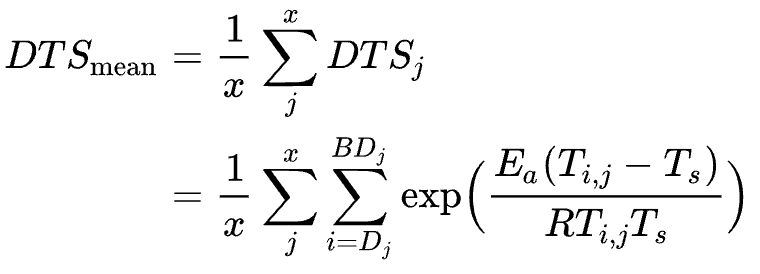

In [26]:
from IPython.display import Image
Image(filename='Image/DTSj Formula.png')

### Ê∫´Â∫¶È´òÔºåÁîüÈï∑Âø´ÔºõÊ∫´Â∫¶‰ΩéÔºåÁîüÈï∑ÊÖ¢

	‚Ä¢T_i,jÔºöÁ¨¨ j Âπ¥Á¨¨ i Â§©ÁöÑÊØèÊó•Âπ≥ÂùáÊ∞£Ê∫´ÔºàËΩâÁÇ∫ÈñãÁàæÊñáÔºâ
	‚Ä¢T_sÔºöÊ®ôÊ∫ñÊ∫´Â∫¶ÔºåË®≠ÁÇ∫ÊîùÊ∞è 17¬∞CÔºåÂç≥ 290.15 K
	‚Ä¢D_jÔºöÁ¨¨ j Âπ¥ÂÜ¨Áú†ÁµêÊùüÁöÑÊó•Êúü
	‚Ä¢BD_jÔºöÁ¨¨ j Âπ¥ÁöÑÂØ¶ÈöõÈñãËä±Êó•
	‚Ä¢DTS_jÔºöÊ®ôÊ∫ñÂèçÊáâÊôÇÈñì

	‚Ä¢DTSÔºö‰ª£Ë°®Êüê‰∏ÄÂπ¥ÔºåÊØèÊó•ÁöÑÁîüÁêÜÁ¥ØÁ©çÂÄº
	‚Ä¢DTSjÔºö‰ª£Ë°®Êüê‰∏ÄÂπ¥ÁöÑÁîüÁêÜÁ∏ΩÁ¥ØÁ©çÂÄº
	‚Ä¢DTSeanÔºö‰ª£Ë°®ÂÖ®Âπ¥ÁöÑÂπ≥ÂùáÁîüÁêÜÁ∏ΩÁ¥ØÁ©çÂÄº

### Ë®àÁÆóË®ìÁ∑¥ÈõÜÁöÑ DTS mean

In [29]:
# Â∞áË®ìÁ∑¥ÈõÜÁöÑ Dj ÂëΩÂêçÁÇ∫ train_dj_dictÊñπ‰æø‰∏ãÂÄãÂÖ¨Âºè‰ΩøÁî®
train_dj_dict = dict(zip(train_allyears_dj_days["Âπ¥"], train_allyears_dj_days["Dj"]))
train_dj_dict

{1961: 39,
 1962: 42,
 1963: 38,
 1964: 40,
 1965: 39,
 1966: 45,
 1967: 42,
 1968: 44,
 1969: 43,
 1970: 39,
 1971: 43,
 1972: 46,
 1973: 45,
 1974: 40,
 1975: 41,
 1976: 45,
 1977: 41,
 1978: 42,
 1979: 51,
 1980: 42,
 1981: 42,
 1982: 45,
 1983: 45,
 1984: 36,
 1985: 41,
 1986: 39,
 1987: 46,
 1988: 45,
 1989: 51,
 1990: 48,
 1991: 47,
 1992: 48,
 1993: 47,
 1994: 44,
 1995: 46,
 1996: 45,
 1997: 50,
 1998: 47,
 1999: 49,
 2000: 48,
 2001: 45,
 2002: 56,
 2003: 44,
 2004: 50,
 2005: 45,
 2006: 46,
 2007: 55,
 2008: 47,
 2009: 50,
 2010: 47,
 2011: 44}

### ÂæûÂÜ¨Áú†ÁµêÊùüÈñãÂßãÂà∞ÈñãËä±Êó•Ôºå‰∏çÂêåÊ¥ªÂåñËÉΩÔºàEaÔºâ‰∏ãÔºåÊ´ªËä±ÊØèÂ§©Á¥ØÂä†Â§öÂ∞ëÁîüÁêÜÂèçÊáâÈáèÔºàDTSjÔºâÁõ¥Âà∞ÈñãËä±

In [31]:
def calculate_dts_all(train, train_dj_dict, ea_range):
    R = 0.00198588
    Ts = 17 + 273.15

    dtsj_per_ea = {}
    dts_mean_per_ea = {}

    for ea in ea_range:
        dts_list = []

        for year in trainyears:
            Dj_day = train_dj_dict[year]

            blossom_row = train[(train["Âπ¥"] == year) & (train["ÈñãËä±Êó•"] == 1)] # ÊâæÂá∫ÈñãËä±Êó•ÈÇ£‰∏ÄÂÄãrow, ‰∏¶ËÆÄÂèñindex
            if blossom_row.empty:
                continue
            blossom_index = blossom_row.index[0]

            base_row = train[(train["Âπ¥"] == year) & (train["Êúà"] == 1) & (train["Êó•"] == 1)] # ÊâæÁï∂Âπ¥ 1 Êúà 1 Êó•Âì™‰∏ÄÂÄã row
            if base_row.empty:
                continue
            base_index = base_row.index[0]

            start_day = base_index + Dj_day - 1
            if start_day > blossom_index:
                continue

            DTSj = 0
            for i in range(start_day, blossom_index + 1): # Ê†πÊìöÂπ≥ÂùáÁµïÂ∞çÊ∫´Â∫¶ÔºåË®àÁÆóÂá∫ÂÜ¨Áú†ÁµêÊùüÊó•~ ÈñãËä±Êó•ÁöÑÁîüÁêÜÁ¥ØÁ©çÂÄº
                T_ij = train.loc[i, "Âπ≥ÂùáÊ∞£Ê∫´"] + 273.15
                exp_val = np.exp((ea * (T_ij - Ts)) / (R * T_ij * Ts))
                DTSj += exp_val

            dts_list.append(DTSj)

        dtsj_per_ea[ea] = dts_list # Ê†πÊìö‰∏çÂêå Ea‰∏ãÔºåÊØèÂπ¥ÁöÑ DTSj
        dts_mean_per_ea[ea] = np.mean(dts_list) if dts_list else None #ÈÄôÂÄã Ea‰∏ãÁöÑ ÂÖ®Âπ¥‰ªΩÁöÑ DTSmean

    return dtsj_per_ea, dts_mean_per_ea

### ÊâæÂá∫‰∏çÂêåÊ¥ªÂåñËÉΩÔºàEaÔºâ‰∏ãÔºåÂÜ¨Áú†ÁµêÊùüÊó•Âà∞ÈñãËä±ÊâÄÈúÄË¶ÅÁ¥ØÁ©çÁöÑÁ∏ΩÁîüÁêÜÂèçÊáâÈáèDTSj

In [33]:
trainyears = sorted(train_dj_dict.keys())
ea_range = range(5, 41)
dtsj_per_ea, dts_mean_per_ea = calculate_dts_all(train, train_dj_dict, ea_range)

# ÂàÜÈñãÂç∞Âá∫‰æÜÔºÅ
print("‚ñ∂Ô∏è DTSj per Ea")
print(dtsj_per_ea)

‚ñ∂Ô∏è DTSj per Ea
{5: [np.float64(38.90294752046194), np.float64(37.309371114395105), np.float64(39.56829914061329), np.float64(39.1404027525059), np.float64(38.84760353939216), np.float64(27.390533459351005), np.float64(36.11365947837218), np.float64(34.731766881268136), np.float64(40.36284774570576), np.float64(42.69024978114609), np.float64(35.49457292422535), np.float64(32.465370644638966), np.float64(34.85494374090707), np.float64(38.889198694676686), np.float64(34.73366037354689), np.float64(29.35869026037311), np.float64(30.757462657036253), np.float64(36.14456124932306), np.float64(24.77352848615093), np.float64(37.02223353598626), np.float64(32.9458688954516), np.float64(29.413997705417753), np.float64(34.565907981575705), np.float64(46.80563337426903), np.float64(39.49348439766339), np.float64(39.95908078124204), np.float64(27.612773484207697), np.float64(36.19095309556641), np.float64(22.581769152343092), np.float64(26.10668544014615), np.float64(33.314363029167815), np.flo

### ‰∏çÂêåÊ¥ªÂåñËÉΩÔºàEaÔºâ‰∏ãÔºåÂÜ¨Áú†ÁµêÊùüÊó•Âà∞ÈñãËä±ÊâÄÈúÄË¶ÅÁ¥ØÁ©çÁöÑ„ÄåÂπ≥Âùá„ÄçÁ∏ΩÁîüÁêÜÂèçÊáâÈáè DTSmean

In [35]:
print("\n‚ñ∂Ô∏è DTSmean per Ea")
print(dts_mean_per_ea)


‚ñ∂Ô∏è DTSmean per Ea
{5: np.float64(32.42568881394586), 6: np.float64(30.691088373886533), 7: np.float64(29.061951838442642), 8: np.float64(27.53137254830716), 9: np.float64(26.09292151926747), 10: np.float64(24.740612942228903), 11: np.float64(23.468872267072257), 12: np.float64(22.272506670660263), 13: np.float64(21.146677725174047), 14: np.float64(20.08687609753441), 15: np.float64(19.088898124051887), 16: np.float64(18.14882411675235), 17: np.float64(17.262998269131955), 18: np.float64(16.428010039488385), 19: np.float64(15.640676899530689), 20: np.float64(14.898028344756435), 21: np.float64(14.197291071165845), 22: np.float64(13.535875230315687), 23: np.float64(12.911361681554931), 24: np.float64(12.321490166576957), 25: np.float64(11.764148337215508), 26: np.float64(11.237361572742918), 27: np.float64(10.739283527838463), 28: np.float64(10.268187356914861), 29: np.float64(9.822457564654758), 30: np.float64(9.400582436444271), 31: np.float64(9.001147005924784), 32: np.float64(8.

In [36]:
# Âè™Âç∞ Ea=5 ÁöÑ DTSj
print("‚ñ∂Ô∏è Ea = 5 ÁöÑ DTSjÊ∏ÖÂñÆÔºö\n")
for year, dtsj in zip(trainyears, dtsj_per_ea[5]):
    print(f"{year} Âπ¥ÁöÑ DTSj ÁÇ∫ {dtsj:.5f}")

# ÂÜçÂç∞‰∏ÄË°å DTSmean
print("\n‚ñ∂Ô∏è Ea = 5 ÁöÑ DTSmean Âπ≥ÂùáÂÄºÔºö")
print(f"DTSmean = {dts_mean_per_ea[5]:.5f}")

‚ñ∂Ô∏è Ea = 5 ÁöÑ DTSjÊ∏ÖÂñÆÔºö

1961 Âπ¥ÁöÑ DTSj ÁÇ∫ 38.90295
1962 Âπ¥ÁöÑ DTSj ÁÇ∫ 37.30937
1963 Âπ¥ÁöÑ DTSj ÁÇ∫ 39.56830
1964 Âπ¥ÁöÑ DTSj ÁÇ∫ 39.14040
1965 Âπ¥ÁöÑ DTSj ÁÇ∫ 38.84760
1966 Âπ¥ÁöÑ DTSj ÁÇ∫ 27.39053
1967 Âπ¥ÁöÑ DTSj ÁÇ∫ 36.11366
1968 Âπ¥ÁöÑ DTSj ÁÇ∫ 34.73177
1969 Âπ¥ÁöÑ DTSj ÁÇ∫ 40.36285
1970 Âπ¥ÁöÑ DTSj ÁÇ∫ 42.69025
1971 Âπ¥ÁöÑ DTSj ÁÇ∫ 35.49457
1972 Âπ¥ÁöÑ DTSj ÁÇ∫ 32.46537
1973 Âπ¥ÁöÑ DTSj ÁÇ∫ 34.85494
1974 Âπ¥ÁöÑ DTSj ÁÇ∫ 38.88920
1975 Âπ¥ÁöÑ DTSj ÁÇ∫ 34.73366
1976 Âπ¥ÁöÑ DTSj ÁÇ∫ 29.35869
1977 Âπ¥ÁöÑ DTSj ÁÇ∫ 30.75746
1978 Âπ¥ÁöÑ DTSj ÁÇ∫ 36.14456
1979 Âπ¥ÁöÑ DTSj ÁÇ∫ 24.77353
1980 Âπ¥ÁöÑ DTSj ÁÇ∫ 37.02223
1981 Âπ¥ÁöÑ DTSj ÁÇ∫ 32.94587
1982 Âπ¥ÁöÑ DTSj ÁÇ∫ 29.41400
1983 Âπ¥ÁöÑ DTSj ÁÇ∫ 34.56591
1984 Âπ¥ÁöÑ DTSj ÁÇ∫ 46.80563
1985 Âπ¥ÁöÑ DTSj ÁÇ∫ 39.49348
1986 Âπ¥ÁöÑ DTSj ÁÇ∫ 39.95908
1987 Âπ¥ÁöÑ DTSj ÁÇ∫ 27.61277
1988 Âπ¥ÁöÑ DTSj ÁÇ∫ 36.19095
1989 Âπ¥ÁöÑ DTSj ÁÇ∫ 22.58177
1990 Âπ¥ÁöÑ DTSj ÁÇ∫ 26.10669
1991 Âπ¥ÁöÑ DTSj ÁÇ∫ 33.31436
1992 Âπ¥ÁöÑ DTSj ÁÇ∫ 28.56483
1993 Âπ

### ÈªëÁ∑öÁÇ∫ Ea Âæû5Âà∞40ÁöÑË®ìÁ∑¥ÈõÜÂÖ®Âπ¥Â∫¶ DTS Âπ≥ÂùáÂÄº
### Á¥ÖÁ∑öÁÇ∫ Ea Âæû5Âà∞40ÁöÑË®ìÁ∑¥ÈõÜÂÖ®Âπ¥Â∫¶ DTS Âπ≥ÂùáÂÄºÁöÑÁ∏ΩÂπ≥Âùá

/var/folders/dz/rm4p0lbd3ls5944_nc31vh1h0000gn/T/ipykernel_5728/2668545264.py:30: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-mo" (-> color='m'). The keyword argument will take precedence.
  plt.plot(all_ea, avg_dts_mean_line, "-mo", label="DTSmean over all Ea", color='lightpink')


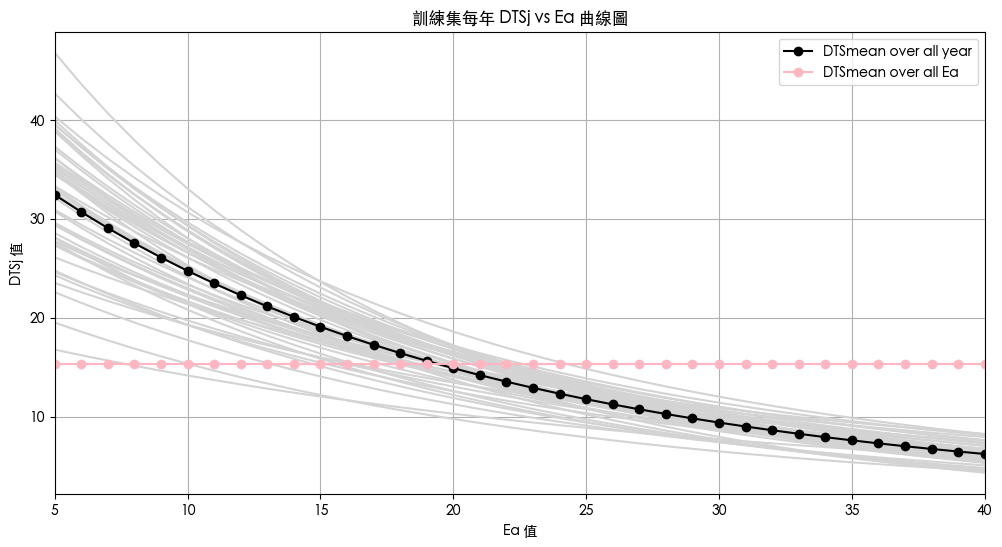

In [38]:
all_ea = list(dtsj_per_ea.keys())

# Êï¥ÁêÜÊàê dtsj_for_each_year[i][j] = Á¨¨ i Âπ¥Â∞çÊáâÁ¨¨ j ÂÄã Ea ÁöÑ DTS
dtsj_for_each_year = []
for i in range(len(trainyears)):
    yearly_dts = []
    for ea in all_ea:
        try:
            yearly_dts.append(dtsj_per_ea[ea][i])
        except IndexError:
            yearly_dts.append(None)
    dtsj_for_each_year.append(yearly_dts)

# Ë®àÁÆóÂπ≥Âùá DTSmean
dts_mean_list = list(dts_mean_per_ea.values())
avg_dts_mean = np.nanmean([val for val in dts_mean_list if val is not None])
avg_dts_mean_line = [avg_dts_mean] * len(all_ea)

# Áï´Âúñ
plt.figure(figsize=(12, 6))

# Áï´ÊØèÂπ¥ÁöÑ DTS vs Ea Êõ≤Á∑öÔºå‰∏çÂä† label
for i in range(len(trainyears)):
    plt.plot(all_ea, dtsj_for_each_year[i], color='lightgray')  # Êàñ alpha=0.5

# Áï´ DTSmean Á∑öÔºàÈªëËâ≤ÈªûÔºâ
plt.plot(all_ea, dts_mean_list, "-ko", label="DTSmean over all year")

# Áï´ DTSmean over all Ea ÁöÑÊ©´Á∑öÔºàÁ≤âÁ¥ÖÁ∑öÔºâ
plt.plot(all_ea, avg_dts_mean_line, "-mo", label="DTSmean over all Ea", color='lightpink')

# Âä†Âúñ‰æãÔºåÂè™ÊúÉÈ°ØÁ§∫‰∏äÈù¢ÈÄôÂÖ©Ê¢ùÁ∑ö
plt.xlabel("Ea ÂÄº")
plt.ylabel("DTSj ÂÄº")
plt.title("Ë®ìÁ∑¥ÈõÜÊØèÂπ¥ DTSj vs Ea Êõ≤Á∑öÂúñ")
plt.xlim(min(all_ea), max(all_ea))
plt.grid(True)
plt.legend()  # Âè™ÊúÉÈ°ØÁ§∫‰Ω†ÊúâË®≠ÂÆö label ÁöÑÁ∑öÊ¢ù
plt.savefig('Ë®ìÁ∑¥ÈõÜÊØèÂπ¥ DTSj vs Ea Êõ≤Á∑öÂúñ', dpi=300, bbox_inches='tight')
plt.show()

### Ê¥ªÂåñËÉΩ Ea Ë∂äÂ∞èÔºåÊ´ªËä±ÈñãËä±ÊâÄÈúÄÊôÇÈñì(DTSÂ§ß)Ë∂ä‰πÖÔºàÂèçÊáâË∂äÊÖ¢Ôºâ„ÄÇ

In [40]:
print("EaÂÄº Â∞çÊáâ Âπ≥ÂùáDTSmeanÔºö")
for ea, mean_dts in zip(all_ea, dts_mean_list):
    if mean_dts is not None:
        print(f"Ea = {ea:2d}ÔºåÂÖ®Âπ¥Âπ≥Âùá DTSmean = {mean_dts}")
    else:
        print(f"Ea = {ea:2d}ÔºåÊ≤íÊúâË≥áÊñô")

print()
print(mean_dts.mean)

EaÂÄº Â∞çÊáâ Âπ≥ÂùáDTSmeanÔºö
Ea =  5ÔºåÂÖ®Âπ¥Âπ≥Âùá DTSmean = 32.42568881394586
Ea =  6ÔºåÂÖ®Âπ¥Âπ≥Âùá DTSmean = 30.691088373886533
Ea =  7ÔºåÂÖ®Âπ¥Âπ≥Âùá DTSmean = 29.061951838442642
Ea =  8ÔºåÂÖ®Âπ¥Âπ≥Âùá DTSmean = 27.53137254830716
Ea =  9ÔºåÂÖ®Âπ¥Âπ≥Âùá DTSmean = 26.09292151926747
Ea = 10ÔºåÂÖ®Âπ¥Âπ≥Âùá DTSmean = 24.740612942228903
Ea = 11ÔºåÂÖ®Âπ¥Âπ≥Âùá DTSmean = 23.468872267072257
Ea = 12ÔºåÂÖ®Âπ¥Âπ≥Âùá DTSmean = 22.272506670660263
Ea = 13ÔºåÂÖ®Âπ¥Âπ≥Âùá DTSmean = 21.146677725174047
Ea = 14ÔºåÂÖ®Âπ¥Âπ≥Âùá DTSmean = 20.08687609753441
Ea = 15ÔºåÂÖ®Âπ¥Âπ≥Âùá DTSmean = 19.088898124051887
Ea = 16ÔºåÂÖ®Âπ¥Âπ≥Âùá DTSmean = 18.14882411675235
Ea = 17ÔºåÂÖ®Âπ¥Âπ≥Âùá DTSmean = 17.262998269131955
Ea = 18ÔºåÂÖ®Âπ¥Âπ≥Âùá DTSmean = 16.428010039488385
Ea = 19ÔºåÂÖ®Âπ¥Âπ≥Âùá DTSmean = 15.640676899530689
Ea = 20ÔºåÂÖ®Âπ¥Âπ≥Âùá DTSmean = 14.898028344756435
Ea = 21ÔºåÂÖ®Âπ¥Âπ≥Âùá DTSmean = 14.197291071165845
Ea = 22ÔºåÂÖ®Âπ¥Âπ≥Âùá DTSmean = 13.535875230315687
Ea = 23ÔºåÂÖ®Âπ¥Âπ≥Âùá DTSmean = 12.911

In [41]:
print(f'Âú®ÊâÄÊúâÂπ¥‰ªΩÊ∏¨Ë©¶ÁöÑ ÊâÄÊúâEaÊ¥ªÂåñËÉΩÊï∏ÂÄº‰∏≠Ôºà5-40Ôºâ ÔºåDTSmeanÁöÑÂÄºÁÇ∫Ôºö{avg_dts_mean}')

Âú®ÊâÄÊúâÂπ¥‰ªΩÊ∏¨Ë©¶ÁöÑ ÊâÄÊúâEaÊ¥ªÂåñËÉΩÊï∏ÂÄº‰∏≠Ôºà5-40Ôºâ ÔºåDTSmeanÁöÑÂÄºÁÇ∫Ôºö15.286928827809199


### Êé•‰∏ã‰æÜË¶ÅÊØîËºÉ
### „ÄåÂÜ¨Áú†ÁµêÊùüÂà∞ÂØ¶ÈöõÈñãËä±Êó•Êó•Êï∏„Äç
### „ÄåÂÜ¨Áú†ÁµêÊùüÊó•ÈñãÂßãÔºå‰ΩøÁî® DTSj Á¥ØÂä†Âà∞‰∏çÂêå Ea ‰∏ãÁöÑ DTSmean Êé®ÁÆóÂá∫Áõ¥Âà∞È†êÊ∏¨ÁöÑÈñãËä±Êó•Êó•Êï∏„Äç
#### ÂÖ∑È´îÁõÆÊ®ôÔºö
	‚Ä¢ÂÜ¨Áú†ÁµêÊùüÊó•Ëµ∑ÁÆóÔºåÊØèÂ§©ÂéªÁ¥ØÁ©çÁîüÁêÜÂÄºÔºàDTSjÔºâ
	‚Ä¢‰∏ÄÁõ¥Á¥ØÁ©çÂà∞ÈñãËä±Êó•ÔºåÈÄôÊÆµÁöÑ DTSj
	‚Ä¢ÁÑ∂ÂæåÊØîËºÉÈÄôÂÄã„ÄåÂØ¶Èöõ„ÄçÈñãËä±Êó• DTSjÂÄºÔºàÁï∂Âπ¥ÔºâÂíå„ÄåÈ†êÊ∏¨„Äç‰∏çÂêå Ea‰∏ã ÁöÑ DTSmean
	‚Ä¢ÁúãÁúã„ÄåÂØ¶ÈöõÂÄº„ÄçË∑ü„ÄåÂπ≥ÂùáÂÄº„ÄçÁöÑ loss ÊòØÂ§öÂ∞ë

	‚Ä¢Ê≠•È©ü 1ÔºöÊ†πÊìö DTSmean Âíå DTSjÔºåÊé®ÂõûÂéª„ÄåÈ†êÊ∏¨ÈñãËä±Êó•„Äç
	‚Ä¢Ê≠•È©ü 2ÔºöÊää„ÄåÈ†êÊ∏¨ÈñãËä±Êó•„ÄçË∑ü„ÄåÁúüÂØ¶ÈñãËä±Êó•„ÄçÂÅö Loss Ë®àÁÆó
	‚Ä¢Ê≠•È©ü 3ÔºöÊâæÂá∫ Loss ÊúÄÂ∞èÁöÑÈÇ£ÂÄã EaÔºåÁï∂ÊàêÊúÄ‰Ω≥ Ea

#### Ë®ìÁ∑¥ÈõÜÁöÑ DjÔºötrain_dj_dict
#### ÂèñÂæóÂπ¥‰ªΩÂàóË°® years = sorted(train_dj_dict.keys())
#### Ë®ìÁ∑¥ÈõÜÁöÑ DTSmeanÔºöavg_dts_mean

### ÂæûË®ìÁ∑¥ÈõÜË≥áÊñô‰∏≠ÔºåÊâæÊØè‰∏ÄÂπ¥ÈñãËä±ÁöÑÈÇ£Â§©ÔºåÂõûÂÇ≥ÊØèÂπ¥ÁöÑÂØ¶ÈöõÈñãËä±Êó•ÔºàÁ¨¨ÂπæÂ§©Ôºâ

In [45]:
def get_actual_bloom_days(train):
    actual_bloom_days = []
    
    for year in trainyears:
        # ÊâæÈÄô‰∏ÄÂπ¥ÁöÑÈñãËä±Êó•
        blossom_row = train[(train["Âπ¥"] == year) & (train["ÈñãËä±Êó•"] == 1)]
        
        if blossom_row.empty:
            # Â¶ÇÊûúÈÄôÂπ¥Ê≤íÊúâË≥áÊñôÔºåÂ∞±Ë∑≥ÈÅé
            continue
        
        month = int(blossom_row["Êúà"].values[0])
        day = int(blossom_row["Êó•"].values[0])
        
        # Ë®àÁÆóÈÄô‰∏ÄÂ§©ÊòØÈÇ£‰∏ÄÂπ¥ÁöÑÁ¨¨ÂπæÂ§©
        base_date = datetime.date(year, 1, 1)
        bloom_date = datetime.date(year, month, day)
        actual_day = (bloom_date - base_date).days + 1
        
        actual_bloom_days.append(actual_day)

    return trainyears, actual_bloom_days

In [46]:
trainyears, actual_bloom_days = get_actual_bloom_days(train)

for year, bloom_day in zip(trainyears, actual_bloom_days):
    print(f'{year}Âπ¥ÁöÑÈñãËä±Êó•ÊòØÁ¨¨{bloom_day}Â§©')

1961Âπ¥ÁöÑÈñãËä±Êó•ÊòØÁ¨¨91Â§©
1962Âπ¥ÁöÑÈñãËä±Êó•ÊòØÁ¨¨91Â§©
1963Âπ¥ÁöÑÈñãËä±Êó•ÊòØÁ¨¨91Â§©
1964Âπ¥ÁöÑÈñãËä±Êó•ÊòØÁ¨¨93Â§©
1965Âπ¥ÁöÑÈñãËä±Êó•ÊòØÁ¨¨92Â§©
1966Âπ¥ÁöÑÈñãËä±Êó•ÊòØÁ¨¨79Â§©
1967Âπ¥ÁöÑÈñãËä±Êó•ÊòØÁ¨¨89Â§©
1968Âπ¥ÁöÑÈñãËä±Êó•ÊòØÁ¨¨89Â§©
1969Âπ¥ÁöÑÈñãËä±Êó•ÊòØÁ¨¨96Â§©
1970Âπ¥ÁöÑÈñãËä±Êó•ÊòØÁ¨¨97Â§©
1971Âπ¥ÁöÑÈñãËä±Êó•ÊòØÁ¨¨89Â§©
1972Âπ¥ÁöÑÈñãËä±Êó•ÊòØÁ¨¨88Â§©
1973Âπ¥ÁöÑÈñãËä±Êó•ÊòØÁ¨¨90Â§©
1974Âπ¥ÁöÑÈñãËä±Êó•ÊòØÁ¨¨92Â§©
1975Âπ¥ÁöÑÈñãËä±Êó•ÊòØÁ¨¨88Â§©
1976Âπ¥ÁöÑÈñãËä±Êó•ÊòØÁ¨¨82Â§©
1977Âπ¥ÁöÑÈñãËä±Êó•ÊòØÁ¨¨81Â§©
1978Âπ¥ÁöÑÈñãËä±Êó•ÊòØÁ¨¨90Â§©
1979Âπ¥ÁöÑÈñãËä±Êó•ÊòØÁ¨¨82Â§©
1980Âπ¥ÁöÑÈñãËä±Êó•ÊòØÁ¨¨91Â§©
1981Âπ¥ÁöÑÈñãËä±Êó•ÊòØÁ¨¨85Â§©
1982Âπ¥ÁöÑÈñãËä±Êó•ÊòØÁ¨¨82Â§©
1983Âπ¥ÁöÑÈñãËä±Êó•ÊòØÁ¨¨90Â§©
1984Âπ¥ÁöÑÈñãËä±Êó•ÊòØÁ¨¨102Â§©
1985Âπ¥ÁöÑÈñãËä±Êó•ÊòØÁ¨¨93Â§©
1986Âπ¥ÁöÑÈñãËä±Êó•ÊòØÁ¨¨93Â§©
1987Âπ¥ÁöÑÈñãËä±Êó•ÊòØÁ¨¨82Â§©
1988Âπ¥ÁöÑÈñãËä±Êó•ÊòØÁ¨¨93Â§©
1989Âπ¥ÁöÑÈñãËä±Êó•ÊòØÁ¨¨79Â§©
1990Âπ¥ÁöÑÈñãËä±Êó•ÊòØÁ¨¨79Â§©
1991Âπ¥ÁöÑÈñãËä±Êó•ÊòØÁ¨¨89Â§©
1992Âπ¥ÁöÑÈñãËä±Êó•ÊòØÁ¨¨84Â§©
1993Âπ¥

### ‰ª•Ê¥ªÂåñËÉΩÔºàEaÔºâ=20ÁÇ∫‰æãÔºåÂÖàË®àÁÆóÂá∫ÈúÄË¶ÅÁ¥ØÁ©çÁöÑÁ∏ΩÁîüÁêÜÂèçÊáâÈáèÔºåÂÜçÊ†πÊìöË®ìÁ∑¥ÈõÜÂÖ®Âπ¥Â∫¶ÁÆóÂá∫ÈúÄÁ¥ØÂä†Â§öÂ∞ëÂ§©Ëá≥Á∏ΩÁîüÁêÜÂèçÊáâÈáèÂæåÊâçÊúÉÈñãËä±

In [48]:
# ÂÖàÂÅáË®≠‰Ω†Ë¶ÅÈÅ∏ÁöÑ Ea
chosen_ea = 20  # ‰Ω†ÂèØ‰ª•ÊèõÊàêÊÉ≥Ë¶ÅÁöÑÂÄº
dts_mean = dts_mean_per_ea[chosen_ea]  # ÊâæÈÄôÂÄã Ea Â∞çÊáâÁöÑ DTSmean

# ÂÑ≤Â≠òÁµêÊûú
results = []

# ÈáùÂ∞çÊØè‰∏ÄÂπ¥ÂÅöËôïÁêÜ
for index, row in train_allyears_dj_days.iterrows():
    year = row['Âπ¥']
    wake_up_date = row['ÂÜ¨Áú†ÁµêÊùüÊó•']  # ÈÄôÊòØÂÜ¨Áú†ÁµêÊùüÊó•ÔºåÊ†ºÂºèÊòØdatetime.date

    # ÊâæÁï∂Âπ¥ÈñãËä±Êó•
    blossom_row = train[(train['Âπ¥'] == year) & (train['ÈñãËä±Êó•'] == 1)]
    if blossom_row.empty:
        continue
    blossom_index = blossom_row.index[0]
    blossom_date = datetime.date(
        train.loc[blossom_index, 'Âπ¥'],
        train.loc[blossom_index, 'Êúà'],
        train.loc[blossom_index, 'Êó•']
    )

    # ÂàùÂßãÂåñ
    accumulated_DTS = 0
    day_counter = 0

    # ÊØèÂ§©Á¥ØÁ©çÔºåÁõ¥Âà∞Ë∂ÖÈÅé DTSmean
    while accumulated_DTS <= dts_mean:
        current_date = wake_up_date + datetime.timedelta(days=day_counter)

        # ÊâæÁï∂Â§©Ë≥áÊñô
        temp_row = train[
            (train['Âπ¥'] == current_date.year) &
            (train['Êúà'] == current_date.month) &
            (train['Êó•'] == current_date.day)
        ]

        if temp_row.empty:
            break  # Â¶ÇÊûúÊâæ‰∏çÂà∞Ë≥áÊñôÔºåË∑≥Âá∫

        avg_temp = temp_row['Âπ≥ÂùáÊ∞£Ê∫´'].values[0] + 273.15  # ËΩâÊàêÁµïÂ∞çÊ∫´Â∫¶
        R = 0.00198588
        Ts = 17 + 273.15
        exp_val = np.exp((chosen_ea * (avg_temp - Ts)) / (R * avg_temp * Ts))
        accumulated_DTS += exp_val

        day_counter += 1

    # Ë®àÁÆóÂØ¶ÈöõÈñãËä±Ë∑ùÈõ¢ÂÜ¨Áú†ÁµêÊùüÂπæÂ§©
    actual_days = (blossom_date - wake_up_date).days

    results.append({
        'Âπ¥': year,
        'Êé®‰º∞Â§©Êï∏': day_counter,
        'ÂØ¶ÈöõÂ§©Êï∏': actual_days,
        'Êé®‰º∞ËàáÂØ¶ÈöõÂ∑ÆË∑ù': day_counter - actual_days
    })

# ËΩâÊàê DataFrame ÁúãÁµêÊûú
results_df = pd.DataFrame(results)
print(results_df)

       Âπ¥  Êé®‰º∞Â§©Êï∏  ÂØ¶ÈöõÂ§©Êï∏  Êé®‰º∞ËàáÂØ¶ÈöõÂ∑ÆË∑ù
0   1961    51    52       -1
1   1962    47    49       -2
2   1963    52    53       -1
3   1964    53    53        0
4   1965    55    53        2
5   1966    38    34        4
6   1967    45    47       -2
7   1968    44    45       -1
8   1969    47    53       -6
9   1970    54    58       -4
10  1971    46    46        0
11  1972    43    42        1
12  1973    45    45        0
13  1974    51    52       -1
14  1975    51    47        4
15  1976    41    37        4
16  1977    43    40        3
17  1978    48    48        0
18  1979    38    31        7
19  1980    49    49        0
20  1981    45    43        2
21  1982    39    37        2
22  1983    46    45        1
23  1984    62    66       -4
24  1985    49    52       -3
25  1986    53    54       -1
26  1987    43    36        7
27  1988    48    48        0
28  1989    39    28       11
29  1990    33    31        2
30  1991    40    42       -2
31  1992

### ÊâæÂá∫Ë®ìÁ∑¥ÈõÜ‰∏≠Ê¥ªÂåñËÉΩÔºàEaÔºâÂú®Â§öÂ∞ëÁöÑÊ¢ù‰ª∂‰∏ãÔºåÊâçËÉΩÂ§†È†êÊ∏¨Âá∫ÂØ¶ÈöõÈñãËä±ÊâÄÈúÄÊó•Êï∏ÊúÄÁõ∏ËøëÁöÑÊó•Êï∏
### ‰ª• MSE ‰ΩúÁÇ∫ÂØ¶ÈöõËàáÈ†êÊ∏¨ÁöÑÂ∑ÆË∑ùË©ï‰º∞

üå∏ ÊúÄ‰Ω≥ Ea: 26ÔºåÂ∞çÊáâÁöÑ MSE: 10.8431ÔºåDTSmean: 11.2374


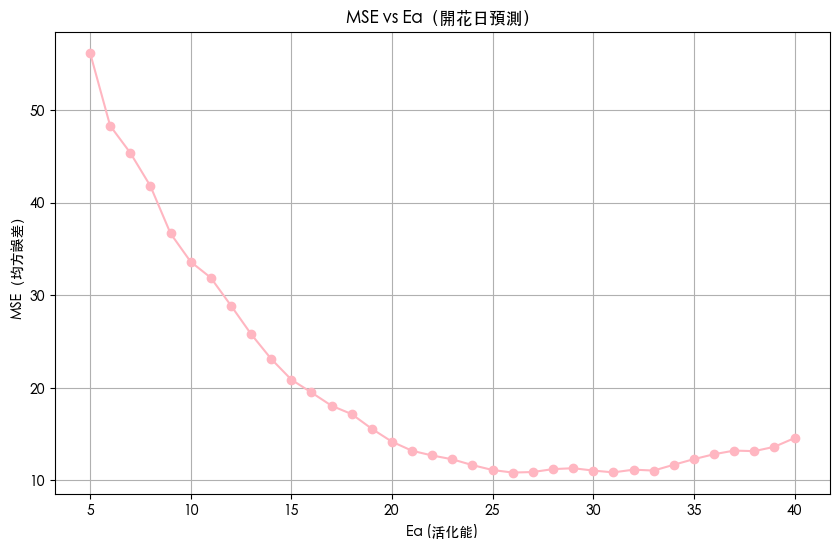

In [50]:
# È†êÂÖàÂÆöÁæ©Â∏∏Êï∏
R = 0.00198588
Ts = 17 + 273.15  # Â∏∏Êï∏Ê∫´Â∫¶ (17¬∞C ËΩâÊàê Kelvin)

# Ê∫ñÂÇôÂÑ≤Â≠òÁµêÊûú
bloom_days_per_ea = []  # ÊØèÂÄã Ea ÁöÑÊé®‰º∞ÈñãËä±Â§©Êï∏
actual_bloom_days = []  # ÁúüÂØ¶ÈñãËä±Â§©Êï∏

# ÊääÊ∞£Ê∫´ËΩâÊàê Kelvin
train['avg_temp_kelvin'] = train['Âπ≥ÂùáÊ∞£Ê∫´'] + 273.15

# ÈñãÂßãÈáùÂ∞çÊØèÂÄã Ea ËôïÁêÜ
for ea in ea_range:
    bloom_days_by_DTSmean = []

    for idx, row in train_allyears_dj_days.iterrows():
        year = row['Âπ¥']
        wake_up_date = row['ÂÜ¨Áú†ÁµêÊùüÊó•']

        # ÊâæÂà∞Ë©≤Âπ¥ÂÜ¨Áú†ÁµêÊùüÊó•ÁöÑ‰ΩçÁΩÆ
        start_row = train[
            (train['Âπ¥'] == wake_up_date.year) &
            (train['Êúà'] == wake_up_date.month) &
            (train['Êó•'] == wake_up_date.day)
        ]
        if start_row.empty:
            continue

        start_idx = start_row.index[0]  # ÂèñÂæóindex
        accumulated_DTS = 0
        current_idx = start_idx

        # ‰∏çÊñ∑Á¥ØÂä†Áõ¥Âà∞ÈÅîÂà∞ DTSmean
        while accumulated_DTS <= dts_mean_per_ea[ea]:
            if current_idx >= len(train):
                break
        
            temp_kelvin = train.loc[current_idx, 'avg_temp_kelvin']
            exp_val = np.exp((ea * (temp_kelvin - Ts)) / (temp_kelvin * Ts * R))
            accumulated_DTS += exp_val
        
            current_idx += 1
        
        bloom_idx = current_idx

        # ÂÜ¨Áú†ÁµêÊùüÊó•
        margin_date = datetime.date(wake_up_date.year, wake_up_date.month, wake_up_date.day)

        # È†êÊ∏¨ÈñãËä±Êó•
        estimated_bloom_date = datetime.date(
            train.loc[bloom_idx, 'Âπ¥'],
            train.loc[bloom_idx, 'Êúà'],
            train.loc[bloom_idx, 'Êó•']
        )

        # Êé®‰º∞Â§©Êï∏
        bloom_duration = (estimated_bloom_date - margin_date).days
        bloom_days_by_DTSmean.append(bloom_duration)

    bloom_days_per_ea.append(bloom_days_by_DTSmean)

# ----------------------------
# ÂÜç‰æÜËôïÁêÜÁúüÂØ¶ÁöÑÈñãËä±Êó•
for idx, row in train_allyears_dj_days.iterrows():
    year = row['Âπ¥']
    wake_up_date = row['ÂÜ¨Áú†ÁµêÊùüÊó•']

    margin_date = datetime.date(wake_up_date.year, wake_up_date.month, wake_up_date.day)

    # ÊâæÂØ¶ÈöõÈñãËä±Êó•
    blossom_row = train[(train['Âπ¥'] == year) & (train['ÈñãËä±Êó•'] == 1)]
    if blossom_row.empty:
        continue

    blossom_idx = blossom_row.index[0]
    blossom_date = datetime.date(
        train.loc[blossom_idx, 'Âπ¥'],
        train.loc[blossom_idx, 'Êúà'],
        train.loc[blossom_idx, 'Êó•']
    )

    bloom_duration = (blossom_date - margin_date).days
    actual_bloom_days.append(bloom_duration)

# ----------------------------
# Ë®àÁÆóÊØèÂÄã Ea ÁöÑ MSE
mse_per_ea = []

for i in range(len(ea_range)):
    squared_errors = []
    for j in range(len(actual_bloom_days)):
        error = bloom_days_per_ea[i][j] - actual_bloom_days[j]
        squared_errors.append(error ** 2)
    mse = np.mean(squared_errors)
    mse_per_ea.append(mse)

# ----------------------------
# ÊâæÂà∞ÊúÄÂ∞èÁöÑ MSE
min_error = np.min(mse_per_ea)
best_idx = np.argmin(mse_per_ea)
best_ea = ea_range[best_idx]
best_dtsm = dts_mean_per_ea[best_ea]

print(f"üå∏ ÊúÄ‰Ω≥ Ea: {best_ea}ÔºåÂ∞çÊáâÁöÑ MSE: {min_error:.4f}ÔºåDTSmean: {best_dtsm:.4f}")

# ----------------------------
# Áï´Âúñ
plt.figure(figsize=(10,6))
plt.plot(ea_range, mse_per_ea, marker='o', color='lightpink')
plt.xlabel('Ea (Ê¥ªÂåñËÉΩ)')
plt.ylabel('MSEÔºàÂùáÊñπË™§Â∑ÆÔºâ')
plt.title('MSE vs EaÔºàÈñãËä±Êó•È†êÊ∏¨Ôºâ')
plt.grid(True)
plt.savefig('MSE vs EaÔºàÈñãËä±Êó•È†êÊ∏¨Ôºâ', dpi=300, bbox_inches='tight')
plt.show()

### ÊâæÂá∫Ë®ìÁ∑¥ÈõÜ‰∏≠Ê¥ªÂåñËÉΩÔºàEaÔºâÂú®Â§öÂ∞ëÁöÑÊ¢ù‰ª∂‰∏ãÔºåÊâçËÉΩÂ§†È†êÊ∏¨Âá∫ÂØ¶ÈöõÈñãËä±ÊâÄÈúÄÊó•Êï∏ÊúÄÁõ∏ËøëÁöÑÊó•Êï∏
### ‰ª• RMSE ‰ΩúÁÇ∫ÂØ¶ÈöõËàáÈ†êÊ∏¨ÁöÑÂ∑ÆË∑ùË©ï‰º∞

üå∏ ÊúÄ‰Ω≥ Ea: 26ÔºåÂ∞çÊáâÁöÑ RMSE: 3.2929ÔºåDTSmean: 11.2374


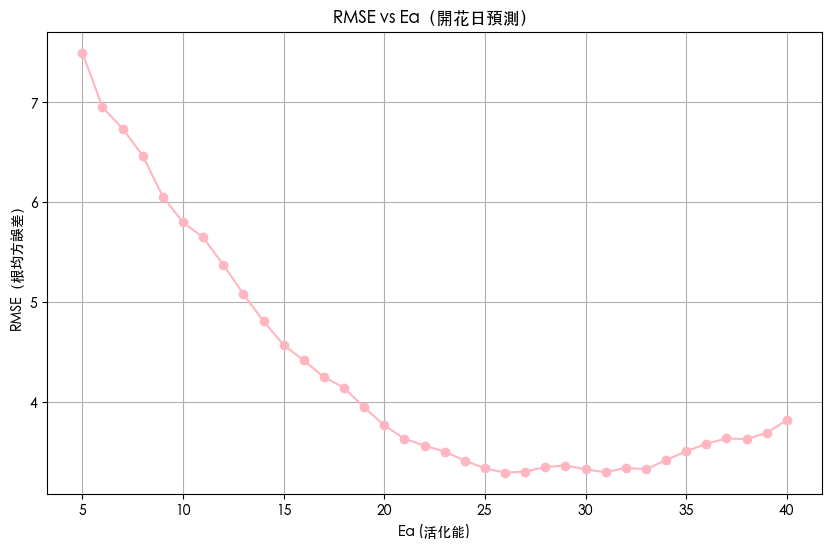

In [52]:
# È†êÂÖàÂÆöÁæ©Â∏∏Êï∏
R = 0.00198588
Ts = 17 + 273.15  # Â∏∏Êï∏Ê∫´Â∫¶ (17¬∞C ËΩâÊàê Kelvin)

# Ê∫ñÂÇôÂÑ≤Â≠òÁµêÊûú
bloom_days_per_ea = []  # ÊØèÂÄã Ea ÁöÑÊé®‰º∞ÈñãËä±Â§©Êï∏
actual_bloom_days = []  # ÁúüÂØ¶ÈñãËä±Â§©Êï∏

# ÊääÊ∞£Ê∫´ËΩâÊàê Kelvin
train['avg_temp_kelvin'] = train['Âπ≥ÂùáÊ∞£Ê∫´'] + 273.15

# ÈñãÂßãÈáùÂ∞çÊØèÂÄã Ea ËôïÁêÜ
for ea in ea_range:
    bloom_days_by_DTSmean = []

    for idx, row in train_allyears_dj_days.iterrows():
        year = row['Âπ¥']
        wake_up_date = row['ÂÜ¨Áú†ÁµêÊùüÊó•']

        # ÊâæÂà∞Ë©≤Âπ¥ÂÜ¨Áú†ÁµêÊùüÊó•ÁöÑ‰ΩçÁΩÆ
        start_row = train[
            (train['Âπ¥'] == wake_up_date.year) &
            (train['Êúà'] == wake_up_date.month) &
            (train['Êó•'] == wake_up_date.day)
        ]
        if start_row.empty:
            continue

        start_idx = start_row.index[0]  # ÂèñÂæóindex
        accumulated_DTS = 0
        current_idx = start_idx

        # ‰∏çÊñ∑Á¥ØÂä†Áõ¥Âà∞ÈÅîÂà∞ DTSmean
        while accumulated_DTS <= dts_mean_per_ea[ea]:
            if current_idx >= len(train):
                break
        
            temp_kelvin = train.loc[current_idx, 'avg_temp_kelvin']
            exp_val = np.exp((ea * (temp_kelvin - Ts)) / (temp_kelvin * Ts * R))
            accumulated_DTS += exp_val
        
            current_idx += 1
        
        bloom_idx = current_idx

        # ÂÜ¨Áú†ÁµêÊùüÊó•
        margin_date = datetime.date(wake_up_date.year, wake_up_date.month, wake_up_date.day)

        # È†êÊ∏¨ÈñãËä±Êó•
        estimated_bloom_date = datetime.date(
            train.loc[bloom_idx, 'Âπ¥'],
            train.loc[bloom_idx, 'Êúà'],
            train.loc[bloom_idx, 'Êó•']
        )

        # Êé®‰º∞Â§©Êï∏
        bloom_duration = (estimated_bloom_date - margin_date).days
        bloom_days_by_DTSmean.append(bloom_duration)

    bloom_days_per_ea.append(bloom_days_by_DTSmean)

# ----------------------------
# ÂÜç‰æÜËôïÁêÜÁúüÂØ¶ÁöÑÈñãËä±Êó•
for idx, row in train_allyears_dj_days.iterrows():
    year = row['Âπ¥']
    wake_up_date = row['ÂÜ¨Áú†ÁµêÊùüÊó•']

    margin_date = datetime.date(wake_up_date.year, wake_up_date.month, wake_up_date.day)

    # ÊâæÂØ¶ÈöõÈñãËä±Êó•
    blossom_row = train[(train['Âπ¥'] == year) & (train['ÈñãËä±Êó•'] == 1)]
    if blossom_row.empty:
        continue

    blossom_idx = blossom_row.index[0]
    blossom_date = datetime.date(
        train.loc[blossom_idx, 'Âπ¥'],
        train.loc[blossom_idx, 'Êúà'],
        train.loc[blossom_idx, 'Êó•']
    )

    bloom_duration = (blossom_date - margin_date).days
    actual_bloom_days.append(bloom_duration)

# ----------------------------
# Ë®àÁÆóÊØèÂÄã Ea ÁöÑ RMSE
rmse_per_ea = []  # ‚úÖ ÊîπËÆäËÆäÊï∏ÂêçÁ®±

for i in range(len(ea_range)):
    squared_errors = []
    for j in range(len(actual_bloom_days)):
        error = bloom_days_per_ea[i][j] - actual_bloom_days[j]
        squared_errors.append(error ** 2)
    rmse = np.sqrt(np.mean(squared_errors))  # ‚úÖ ÈÄôË£°ÊîπÊàê RMSE Ë®àÁÆó
    rmse_per_ea.append(rmse)

# ----------------------------
# ÊâæÂà∞ÊúÄÂ∞èÁöÑ RMSE
min_error = np.min(rmse_per_ea)
best_idx = np.argmin(rmse_per_ea)
best_ea = ea_range[best_idx]
best_dtsm = dts_mean_per_ea[best_ea]

print(f"üå∏ ÊúÄ‰Ω≥ Ea: {best_ea}ÔºåÂ∞çÊáâÁöÑ RMSE: {min_error:.4f}ÔºåDTSmean: {best_dtsm:.4f}")  # ‚úÖ ÈÄôË£°ÊîπÈ°ØÁ§∫ RMSE

# ----------------------------
# Áï´Âúñ
plt.figure(figsize=(10,6))
plt.plot(ea_range, rmse_per_ea, marker='o', color='lightpink')  # ‚úÖ Êîπ‰ΩøÁî® rmse_per_ea
plt.xlabel('Ea (Ê¥ªÂåñËÉΩ)')
plt.ylabel('RMSEÔºàÊ†πÂùáÊñπË™§Â∑ÆÔºâ')  # ‚úÖ ‰øÆÊîπÊ®ôÁ±§
plt.title('RMSE vs EaÔºàÈñãËä±Êó•È†êÊ∏¨Ôºâ')  # ‚úÖ ‰øÆÊîπÊ®ôÈ°å
plt.grid(True)
plt.savefig('RMSE vs EaÔºàÈñãËä±Êó•È†êÊ∏¨Ôºâ', dpi=300, bbox_inches='tight')  # ‚úÖ ‰øÆÊîπÊ™îÂêç
plt.show()

### ÂàóÂç∞Âá∫ÊâÄÊúâÊ¥ªÂåñËÉΩÔºàEaÔºâ‰∏ãÁöÑ DTSmeanÔºåÂØ¶ÈöõËàáÈ†êÊ∏¨‰πãÂ∑ÆË∑ù

In [54]:
# Êï¥ÁêÜÊàê DataFrame
ea_info = pd.DataFrame({
    'Ea': ea_range,
    'DTSmean': [dts_mean_per_ea[ea] for ea in ea_range],
    'RMSE': rmse_per_ea
})

# È°ØÁ§∫ÁµêÊûú
print(ea_info)

    Ea    DTSmean      RMSE
0    5  32.425689  7.496404
1    6  30.691088  6.949397
2    7  29.061952  6.735915
3    8  27.531373  6.464079
4    9  26.092922  6.055301
5   10  24.740613  5.797227
6   11  23.468872  5.646446
7   12  22.272507  5.374230
8   13  21.146678  5.079756
9   14  20.086876  4.808081
10  15  19.088898  4.569721
11  16  18.148824  4.414770
12  17  17.262998  4.249567
13  18  16.428010  4.142084
14  19  15.640677  3.945710
15  20  14.898028  3.765165
16  21  14.197291  3.632641
17  22  13.535875  3.561780
18  23  12.911362  3.503500
19  24  12.321490  3.412779
20  25  11.764148  3.334314
21  26  11.237362  3.292892
22  27  10.739284  3.301812
23  28  10.268187  3.348983
24  29   9.822458  3.363588
25  30   9.400582  3.325481
26  31   9.001147  3.295868
27  32   8.622827  3.340189
28  33   8.264380  3.325481
29  34   7.924646  3.418519
30  35   7.602536  3.506297
31  36   7.297028  3.580996
32  37   7.007166  3.635339
33  38   6.732054  3.627239
34  39   6.470849  3

### ÂàóÂç∞Âá∫ÂØ¶ÈöõËàáÈ†êÊ∏¨ÊâÄÈúÄÁöÑÊó•Êï∏

In [56]:
for year_idx in range(len(actual_bloom_days)):
    print(f"Year {train_allyears_dj_days.iloc[year_idx]['Âπ¥']}: Êé®‰º∞Â§©Êï∏ = {bloom_days_per_ea[best_idx][year_idx]}, ÂØ¶ÈöõÂ§©Êï∏ = {actual_bloom_days[year_idx]}, Ë™§Â∑Æ = {bloom_days_per_ea[best_idx][year_idx] - actual_bloom_days[year_idx]}")

Year 1961: Êé®‰º∞Â§©Êï∏ = 53, ÂØ¶ÈöõÂ§©Êï∏ = 52, Ë™§Â∑Æ = 1
Year 1962: Êé®‰º∞Â§©Êï∏ = 48, ÂØ¶ÈöõÂ§©Êï∏ = 49, Ë™§Â∑Æ = -1
Year 1963: Êé®‰º∞Â§©Êï∏ = 53, ÂØ¶ÈöõÂ§©Êï∏ = 53, Ë™§Â∑Æ = 0
Year 1964: Êé®‰º∞Â§©Êï∏ = 54, ÂØ¶ÈöõÂ§©Êï∏ = 53, Ë™§Â∑Æ = 1
Year 1965: Êé®‰º∞Â§©Êï∏ = 59, ÂØ¶ÈöõÂ§©Êï∏ = 53, Ë™§Â∑Æ = 6
Year 1966: Êé®‰º∞Â§©Êï∏ = 37, ÂØ¶ÈöõÂ§©Êï∏ = 34, Ë™§Â∑Æ = 3
Year 1967: Êé®‰º∞Â§©Êï∏ = 45, ÂØ¶ÈöõÂ§©Êï∏ = 47, Ë™§Â∑Æ = -2
Year 1968: Êé®‰º∞Â§©Êï∏ = 43, ÂØ¶ÈöõÂ§©Êï∏ = 45, Ë™§Â∑Æ = -2
Year 1969: Êé®‰º∞Â§©Êï∏ = 47, ÂØ¶ÈöõÂ§©Êï∏ = 53, Ë™§Â∑Æ = -6
Year 1970: Êé®‰º∞Â§©Êï∏ = 58, ÂØ¶ÈöõÂ§©Êï∏ = 58, Ë™§Â∑Æ = 0
Year 1971: Êé®‰º∞Â§©Êï∏ = 46, ÂØ¶ÈöõÂ§©Êï∏ = 46, Ë™§Â∑Æ = 0
Year 1972: Êé®‰º∞Â§©Êï∏ = 43, ÂØ¶ÈöõÂ§©Êï∏ = 42, Ë™§Â∑Æ = 1
Year 1973: Êé®‰º∞Â§©Êï∏ = 45, ÂØ¶ÈöõÂ§©Êï∏ = 45, Ë™§Â∑Æ = 0
Year 1974: Êé®‰º∞Â§©Êï∏ = 52, ÂØ¶ÈöõÂ§©Êï∏ = 52, Ë™§Â∑Æ = 0
Year 1975: Êé®‰º∞Â§©Êï∏ = 53, ÂØ¶ÈöõÂ§©Êï∏ = 47, Ë™§Â∑Æ = 6
Year 1976: Êé®‰º∞Â§©Êï∏ = 41, ÂØ¶ÈöõÂ§©Êï∏ = 37, Ë™§Â∑Æ = 4
Year 1977: Êé®‰º∞Â§©Êï∏ = 43, ÂØ¶Èöõ

In [57]:
# ÊâæÂà∞ Ea=26 Âú® ea_range ‰∏≠ÁöÑ‰ΩçÁΩÆ
target_ea = 26
target_idx = ea_range.index(target_ea)  # ÊâæÂà∞Ea=20ÊòØÁ¨¨ÂπæÂÄã

# Êü•Áúã Ea=20 ÁöÑÊé®‰º∞ vs ÁúüÂØ¶ÁµêÊûú
for year_idx in range(len(actual_bloom_days)):
    print(f"Year {train_allyears_dj_days.iloc[year_idx]['Âπ¥']}: Êé®‰º∞Â§©Êï∏ = {bloom_days_per_ea[target_idx][year_idx]}, ÂØ¶ÈöõÂ§©Êï∏ = {actual_bloom_days[year_idx]}, Ë™§Â∑Æ = {bloom_days_per_ea[target_idx][year_idx] - actual_bloom_days[year_idx]}")

Year 1961: Êé®‰º∞Â§©Êï∏ = 53, ÂØ¶ÈöõÂ§©Êï∏ = 52, Ë™§Â∑Æ = 1
Year 1962: Êé®‰º∞Â§©Êï∏ = 48, ÂØ¶ÈöõÂ§©Êï∏ = 49, Ë™§Â∑Æ = -1
Year 1963: Êé®‰º∞Â§©Êï∏ = 53, ÂØ¶ÈöõÂ§©Êï∏ = 53, Ë™§Â∑Æ = 0
Year 1964: Êé®‰º∞Â§©Êï∏ = 54, ÂØ¶ÈöõÂ§©Êï∏ = 53, Ë™§Â∑Æ = 1
Year 1965: Êé®‰º∞Â§©Êï∏ = 59, ÂØ¶ÈöõÂ§©Êï∏ = 53, Ë™§Â∑Æ = 6
Year 1966: Êé®‰º∞Â§©Êï∏ = 37, ÂØ¶ÈöõÂ§©Êï∏ = 34, Ë™§Â∑Æ = 3
Year 1967: Êé®‰º∞Â§©Êï∏ = 45, ÂØ¶ÈöõÂ§©Êï∏ = 47, Ë™§Â∑Æ = -2
Year 1968: Êé®‰º∞Â§©Êï∏ = 43, ÂØ¶ÈöõÂ§©Êï∏ = 45, Ë™§Â∑Æ = -2
Year 1969: Êé®‰º∞Â§©Êï∏ = 47, ÂØ¶ÈöõÂ§©Êï∏ = 53, Ë™§Â∑Æ = -6
Year 1970: Êé®‰º∞Â§©Êï∏ = 58, ÂØ¶ÈöõÂ§©Êï∏ = 58, Ë™§Â∑Æ = 0
Year 1971: Êé®‰º∞Â§©Êï∏ = 46, ÂØ¶ÈöõÂ§©Êï∏ = 46, Ë™§Â∑Æ = 0
Year 1972: Êé®‰º∞Â§©Êï∏ = 43, ÂØ¶ÈöõÂ§©Êï∏ = 42, Ë™§Â∑Æ = 1
Year 1973: Êé®‰º∞Â§©Êï∏ = 45, ÂØ¶ÈöõÂ§©Êï∏ = 45, Ë™§Â∑Æ = 0
Year 1974: Êé®‰º∞Â§©Êï∏ = 52, ÂØ¶ÈöõÂ§©Êï∏ = 52, Ë™§Â∑Æ = 0
Year 1975: Êé®‰º∞Â§©Êï∏ = 53, ÂØ¶ÈöõÂ§©Êï∏ = 47, Ë™§Â∑Æ = 6
Year 1976: Êé®‰º∞Â§©Êï∏ = 41, ÂØ¶ÈöõÂ§©Êï∏ = 37, Ë™§Â∑Æ = 4
Year 1977: Êé®‰º∞Â§©Êï∏ = 43, ÂØ¶Èöõ

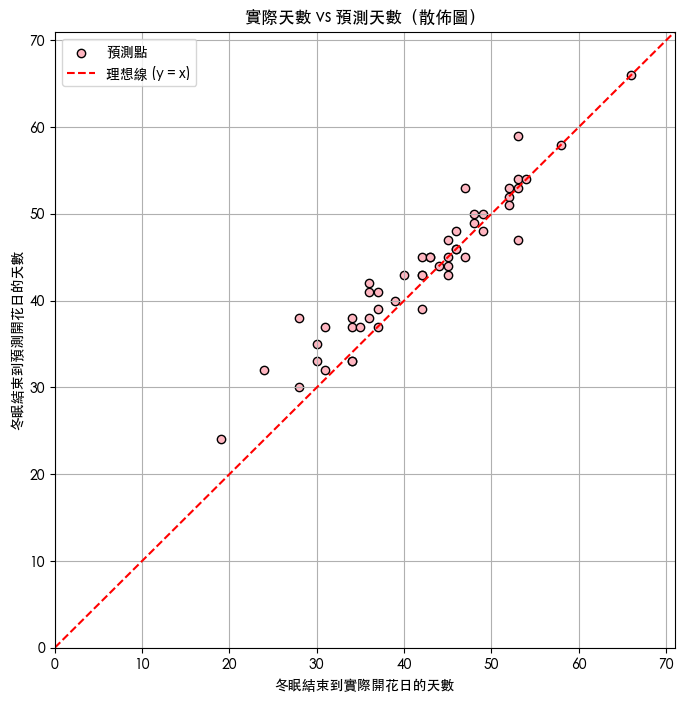

In [58]:
# Áï´Êï£‰ΩàÂúñ
plt.figure(figsize=(8,8))
plt.scatter(actual_bloom_days, bloom_days_per_ea[target_idx], color='lightpink', edgecolor='black', label='È†êÊ∏¨Èªû')

# Áï´ÁêÜÊÉ≥Á∑ö y = x
max_day = max(max(actual_bloom_days), max(bloom_days_per_ea[target_idx])) + 5
plt.plot([0, max_day], [0, max_day], 'r--', label='ÁêÜÊÉ≥Á∑ö (y = x)')

# Ê®ôÈ°åËàáÂ∫ßÊ®ô
plt.xlabel('ÂÜ¨Áú†ÁµêÊùüÂà∞ÂØ¶ÈöõÈñãËä±Êó•ÁöÑÂ§©Êï∏')
plt.ylabel('ÂÜ¨Áú†ÁµêÊùüÂà∞È†êÊ∏¨ÈñãËä±Êó•ÁöÑÂ§©Êï∏')
plt.title('ÂØ¶ÈöõÂ§©Êï∏ vs È†êÊ∏¨Â§©Êï∏ÔºàÊï£‰ΩàÂúñÔºâ')
plt.legend()
plt.grid(True)
plt.xlim(0, max_day)
plt.ylim(0, max_day)
plt.savefig('ÁúüÂØ¶Â§©Êï∏ vs È†êÊ∏¨Â§©Êï∏ÔºàE=27Ôºâ', dpi=300, bbox_inches='tight')
plt.show()

### ÂàóÂç∞Âá∫ÂêÑÂÄãÊ¥ªÂåñËÉΩÔºàEaÔºâ= 5, 10, 15, 20, 30, 25, 40ÔºåÂØ¶ÈöõËàáÈ†êÊ∏¨‰πãÂ∑ÆË∑ù

In [60]:
# ÊâæÂà∞ Ea=5 Âú® ea_range ‰∏≠ÁöÑ‰ΩçÁΩÆ
target_ea = 5
target_idx = ea_range.index(target_ea)  # ÊâæÂà∞Ea=5ÊòØÁ¨¨ÂπæÂÄã

# Êü•Áúã Ea=5 ÁöÑÊé®‰º∞ vs ÂØ¶ÈöõÁµêÊûú
for year_idx in range(len(actual_bloom_days)):
    print(f"Year {train_allyears_dj_days.iloc[year_idx]['Âπ¥']}: Êé®‰º∞Â§©Êï∏ = {bloom_days_per_ea[target_idx][year_idx]}, ÂØ¶ÈöõÂ§©Êï∏ = {actual_bloom_days[year_idx]}, Ë™§Â∑Æ = {bloom_days_per_ea[target_idx][year_idx] - actual_bloom_days[year_idx]}")

Year 1961: Êé®‰º∞Â§©Êï∏ = 45, ÂØ¶ÈöõÂ§©Êï∏ = 52, Ë™§Â∑Æ = -7
Year 1962: Êé®‰º∞Â§©Êï∏ = 44, ÂØ¶ÈöõÂ§©Êï∏ = 49, Ë™§Â∑Æ = -5
Year 1963: Êé®‰º∞Â§©Êï∏ = 46, ÂØ¶ÈöõÂ§©Êï∏ = 53, Ë™§Â∑Æ = -7
Year 1964: Êé®‰º∞Â§©Êï∏ = 47, ÂØ¶ÈöõÂ§©Êï∏ = 53, Ë™§Â∑Æ = -6
Year 1965: Êé®‰º∞Â§©Êï∏ = 46, ÂØ¶ÈöõÂ§©Êï∏ = 53, Ë™§Â∑Æ = -7
Year 1966: Êé®‰º∞Â§©Êï∏ = 42, ÂØ¶ÈöõÂ§©Êï∏ = 34, Ë™§Â∑Æ = 8
Year 1967: Êé®‰º∞Â§©Êï∏ = 44, ÂØ¶ÈöõÂ§©Êï∏ = 47, Ë™§Â∑Æ = -3
Year 1968: Êé®‰º∞Â§©Êï∏ = 44, ÂØ¶ÈöõÂ§©Êï∏ = 45, Ë™§Â∑Æ = -1
Year 1969: Êé®‰º∞Â§©Êï∏ = 45, ÂØ¶ÈöõÂ§©Êï∏ = 53, Ë™§Â∑Æ = -8
Year 1970: Êé®‰º∞Â§©Êï∏ = 47, ÂØ¶ÈöõÂ§©Êï∏ = 58, Ë™§Â∑Æ = -11
Year 1971: Êé®‰º∞Â§©Êï∏ = 44, ÂØ¶ÈöõÂ§©Êï∏ = 46, Ë™§Â∑Æ = -2
Year 1972: Êé®‰º∞Â§©Êï∏ = 43, ÂØ¶ÈöõÂ§©Êï∏ = 42, Ë™§Â∑Æ = 1
Year 1973: Êé®‰º∞Â§©Êï∏ = 44, ÂØ¶ÈöõÂ§©Êï∏ = 45, Ë™§Â∑Æ = -1
Year 1974: Êé®‰º∞Â§©Êï∏ = 45, ÂØ¶ÈöõÂ§©Êï∏ = 52, Ë™§Â∑Æ = -7
Year 1975: Êé®‰º∞Â§©Êï∏ = 46, ÂØ¶ÈöõÂ§©Êï∏ = 47, Ë™§Â∑Æ = -1
Year 1976: Êé®‰º∞Â§©Êï∏ = 43, ÂØ¶ÈöõÂ§©Êï∏ = 37, Ë™§Â∑Æ = 6
Year 1977: Êé®‰º∞Â§©Êï∏ = 

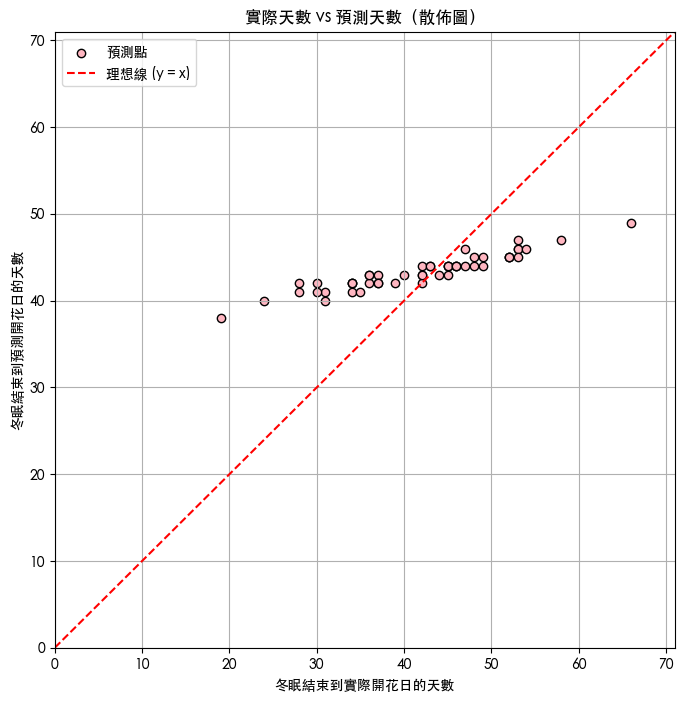

In [61]:
# Áï´Êï£‰ΩàÂúñ
plt.figure(figsize=(8,8))
plt.scatter(actual_bloom_days, bloom_days_per_ea[target_idx], color='lightpink', edgecolor='black', label='È†êÊ∏¨Èªû')

# Áï´ÁêÜÊÉ≥Á∑ö y = x
max_day = max(max(actual_bloom_days), max(bloom_days_per_ea[target_idx])) + 5
plt.plot([0, max_day], [0, max_day], 'r--', label='ÁêÜÊÉ≥Á∑ö (y = x)')

# Ê®ôÈ°åËàáÂ∫ßÊ®ô
plt.xlabel('ÂÜ¨Áú†ÁµêÊùüÂà∞ÂØ¶ÈöõÈñãËä±Êó•ÁöÑÂ§©Êï∏')
plt.ylabel('ÂÜ¨Áú†ÁµêÊùüÂà∞È†êÊ∏¨ÈñãËä±Êó•ÁöÑÂ§©Êï∏')
plt.title('ÂØ¶ÈöõÂ§©Êï∏ vs È†êÊ∏¨Â§©Êï∏ÔºàÊï£‰ΩàÂúñÔºâ')
plt.legend()
plt.grid(True)
plt.xlim(0, max_day)
plt.ylim(0, max_day)
plt.savefig('ÂØ¶ÈöõÂ§©Êï∏ vs È†êÊ∏¨Â§©Êï∏ÔºàE=5Ôºâ', dpi=300, bbox_inches='tight')
plt.show()

In [62]:
# ÊâæÂà∞ Ea=10 Âú® ea_range ‰∏≠ÁöÑ‰ΩçÁΩÆ
target_ea = 10
target_idx = ea_range.index(target_ea)  # ÊâæÂà∞Ea=5ÊòØÁ¨¨ÂπæÂÄã

# Êü•Áúã Ea=10 ÁöÑÊé®‰º∞ vs ÂØ¶ÈöõÁµêÊûú
for year_idx in range(len(actual_bloom_days)):
    print(f"Year {train_allyears_dj_days.iloc[year_idx]['Âπ¥']}: Êé®‰º∞Â§©Êï∏ = {bloom_days_per_ea[target_idx][year_idx]}, ÂØ¶ÈöõÂ§©Êï∏ = {actual_bloom_days[year_idx]}, Ë™§Â∑Æ = {bloom_days_per_ea[target_idx][year_idx] - actual_bloom_days[year_idx]}")

Year 1961: Êé®‰º∞Â§©Êï∏ = 47, ÂØ¶ÈöõÂ§©Êï∏ = 52, Ë™§Â∑Æ = -5
Year 1962: Êé®‰º∞Â§©Êï∏ = 45, ÂØ¶ÈöõÂ§©Êï∏ = 49, Ë™§Â∑Æ = -4
Year 1963: Êé®‰º∞Â§©Êï∏ = 49, ÂØ¶ÈöõÂ§©Êï∏ = 53, Ë™§Â∑Æ = -4
Year 1964: Êé®‰º∞Â§©Êï∏ = 50, ÂØ¶ÈöõÂ§©Êï∏ = 53, Ë™§Â∑Æ = -3
Year 1965: Êé®‰º∞Â§©Êï∏ = 49, ÂØ¶ÈöõÂ§©Êï∏ = 53, Ë™§Â∑Æ = -4
Year 1966: Êé®‰º∞Â§©Êï∏ = 40, ÂØ¶ÈöõÂ§©Êï∏ = 34, Ë™§Â∑Æ = 6
Year 1967: Êé®‰º∞Â§©Êï∏ = 45, ÂØ¶ÈöõÂ§©Êï∏ = 47, Ë™§Â∑Æ = -2
Year 1968: Êé®‰º∞Â§©Êï∏ = 44, ÂØ¶ÈöõÂ§©Êï∏ = 45, Ë™§Â∑Æ = -1
Year 1969: Êé®‰º∞Â§©Êï∏ = 46, ÂØ¶ÈöõÂ§©Êï∏ = 53, Ë™§Â∑Æ = -7
Year 1970: Êé®‰º∞Â§©Êï∏ = 50, ÂØ¶ÈöõÂ§©Êï∏ = 58, Ë™§Â∑Æ = -8
Year 1971: Êé®‰º∞Â§©Êï∏ = 45, ÂØ¶ÈöõÂ§©Êï∏ = 46, Ë™§Â∑Æ = -1
Year 1972: Êé®‰º∞Â§©Êï∏ = 43, ÂØ¶ÈöõÂ§©Êï∏ = 42, Ë™§Â∑Æ = 1
Year 1973: Êé®‰º∞Â§©Êï∏ = 44, ÂØ¶ÈöõÂ§©Êï∏ = 45, Ë™§Â∑Æ = -1
Year 1974: Êé®‰º∞Â§©Êï∏ = 48, ÂØ¶ÈöõÂ§©Êï∏ = 52, Ë™§Â∑Æ = -4
Year 1975: Êé®‰º∞Â§©Êï∏ = 48, ÂØ¶ÈöõÂ§©Êï∏ = 47, Ë™§Â∑Æ = 1
Year 1976: Êé®‰º∞Â§©Êï∏ = 42, ÂØ¶ÈöõÂ§©Êï∏ = 37, Ë™§Â∑Æ = 5
Year 1977: Êé®‰º∞Â§©Êï∏ = 43

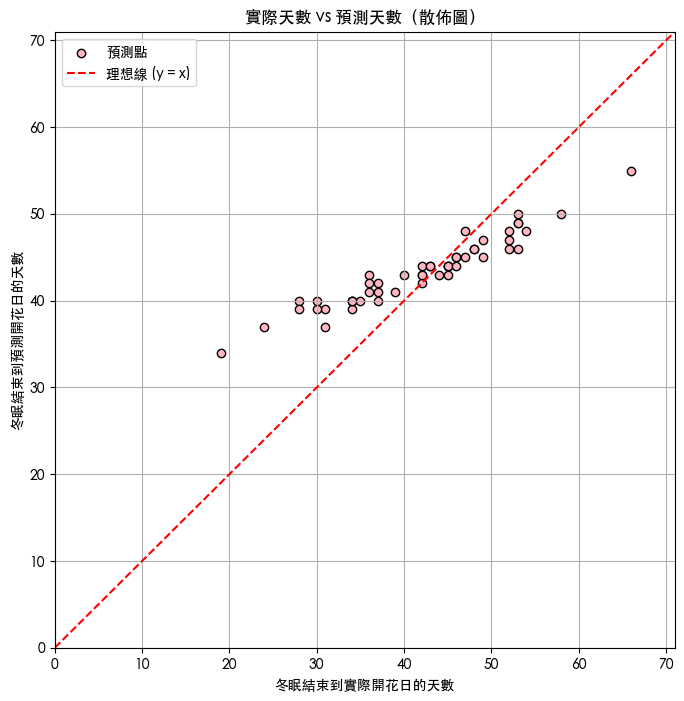

In [63]:
# Áï´Êï£‰ΩàÂúñ
plt.figure(figsize=(8,8))
plt.scatter(actual_bloom_days, bloom_days_per_ea[target_idx], color='lightpink', edgecolor='black', label='È†êÊ∏¨Èªû')

# Áï´ÁêÜÊÉ≥Á∑ö y = x
max_day = max(max(actual_bloom_days), max(bloom_days_per_ea[target_idx])) + 5
plt.plot([0, max_day], [0, max_day], 'r--', label='ÁêÜÊÉ≥Á∑ö (y = x)')

# Ê®ôÈ°åËàáÂ∫ßÊ®ô
plt.xlabel('ÂÜ¨Áú†ÁµêÊùüÂà∞ÂØ¶ÈöõÈñãËä±Êó•ÁöÑÂ§©Êï∏')
plt.ylabel('ÂÜ¨Áú†ÁµêÊùüÂà∞È†êÊ∏¨ÈñãËä±Êó•ÁöÑÂ§©Êï∏')
plt.title('ÂØ¶ÈöõÂ§©Êï∏ vs È†êÊ∏¨Â§©Êï∏ÔºàÊï£‰ΩàÂúñÔºâ')
plt.legend()
plt.grid(True)
plt.xlim(0, max_day)
plt.ylim(0, max_day)
plt.savefig('ÂØ¶ÈöõÂ§©Êï∏ vs È†êÊ∏¨Â§©Êï∏ÔºàE=10Ôºâ', dpi=300, bbox_inches='tight')
plt.show()

In [64]:
# ÊâæÂà∞ Ea=15 Âú® ea_range ‰∏≠ÁöÑ‰ΩçÁΩÆ
target_ea = 15
target_idx = ea_range.index(target_ea)  # ÊâæÂà∞Ea=15ÊòØÁ¨¨ÂπæÂÄã

# Êü•Áúã Ea=15 ÁöÑÊé®‰º∞ vs ÂØ¶ÈöõÁµêÊûú
for year_idx in range(len(actual_bloom_days)):
    print(f"Year {train_allyears_dj_days.iloc[year_idx]['Âπ¥']}: Êé®‰º∞Â§©Êï∏ = {bloom_days_per_ea[target_idx][year_idx]}, ÂØ¶ÈöõÂ§©Êï∏ = {actual_bloom_days[year_idx]}, Ë™§Â∑Æ = {bloom_days_per_ea[target_idx][year_idx] - actual_bloom_days[year_idx]}")

Year 1961: Êé®‰º∞Â§©Êï∏ = 50, ÂØ¶ÈöõÂ§©Êï∏ = 52, Ë™§Â∑Æ = -2
Year 1962: Êé®‰º∞Â§©Êï∏ = 46, ÂØ¶ÈöõÂ§©Êï∏ = 49, Ë™§Â∑Æ = -3
Year 1963: Êé®‰º∞Â§©Êï∏ = 50, ÂØ¶ÈöõÂ§©Êï∏ = 53, Ë™§Â∑Æ = -3
Year 1964: Êé®‰º∞Â§©Êï∏ = 52, ÂØ¶ÈöõÂ§©Êï∏ = 53, Ë™§Â∑Æ = -1
Year 1965: Êé®‰º∞Â§©Êï∏ = 52, ÂØ¶ÈöõÂ§©Êï∏ = 53, Ë™§Â∑Æ = -1
Year 1966: Êé®‰º∞Â§©Êï∏ = 39, ÂØ¶ÈöõÂ§©Êï∏ = 34, Ë™§Â∑Æ = 5
Year 1967: Êé®‰º∞Â§©Êï∏ = 45, ÂØ¶ÈöõÂ§©Êï∏ = 47, Ë™§Â∑Æ = -2
Year 1968: Êé®‰º∞Â§©Êï∏ = 44, ÂØ¶ÈöõÂ§©Êï∏ = 45, Ë™§Â∑Æ = -1
Year 1969: Êé®‰º∞Â§©Êï∏ = 47, ÂØ¶ÈöõÂ§©Êï∏ = 53, Ë™§Â∑Æ = -6
Year 1970: Êé®‰º∞Â§©Êï∏ = 52, ÂØ¶ÈöõÂ§©Êï∏ = 58, Ë™§Â∑Æ = -6
Year 1971: Êé®‰º∞Â§©Êï∏ = 45, ÂØ¶ÈöõÂ§©Êï∏ = 46, Ë™§Â∑Æ = -1
Year 1972: Êé®‰º∞Â§©Êï∏ = 43, ÂØ¶ÈöõÂ§©Êï∏ = 42, Ë™§Â∑Æ = 1
Year 1973: Êé®‰º∞Â§©Êï∏ = 45, ÂØ¶ÈöõÂ§©Êï∏ = 45, Ë™§Â∑Æ = 0
Year 1974: Êé®‰º∞Â§©Êï∏ = 50, ÂØ¶ÈöõÂ§©Êï∏ = 52, Ë™§Â∑Æ = -2
Year 1975: Êé®‰º∞Â§©Êï∏ = 49, ÂØ¶ÈöõÂ§©Êï∏ = 47, Ë™§Â∑Æ = 2
Year 1976: Êé®‰º∞Â§©Êï∏ = 41, ÂØ¶ÈöõÂ§©Êï∏ = 37, Ë™§Â∑Æ = 4
Year 1977: Êé®‰º∞Â§©Êï∏ = 43,

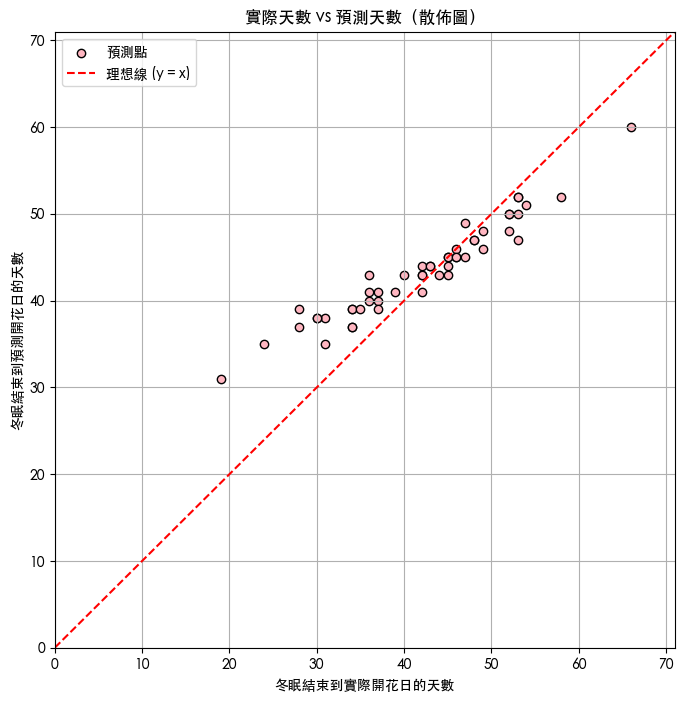

In [65]:
# Áï´Êï£‰ΩàÂúñ
plt.figure(figsize=(8,8))
plt.scatter(actual_bloom_days, bloom_days_per_ea[target_idx], color='lightpink', edgecolor='black', label='È†êÊ∏¨Èªû')

# Áï´ÁêÜÊÉ≥Á∑ö y = x
max_day = max(max(actual_bloom_days), max(bloom_days_per_ea[target_idx])) + 5
plt.plot([0, max_day], [0, max_day], 'r--', label='ÁêÜÊÉ≥Á∑ö (y = x)')

# Ê®ôÈ°åËàáÂ∫ßÊ®ô
plt.xlabel('ÂÜ¨Áú†ÁµêÊùüÂà∞ÂØ¶ÈöõÈñãËä±Êó•ÁöÑÂ§©Êï∏')
plt.ylabel('ÂÜ¨Áú†ÁµêÊùüÂà∞È†êÊ∏¨ÈñãËä±Êó•ÁöÑÂ§©Êï∏')
plt.title('ÂØ¶ÈöõÂ§©Êï∏ vs È†êÊ∏¨Â§©Êï∏ÔºàÊï£‰ΩàÂúñÔºâ')
plt.legend()
plt.grid(True)
plt.xlim(0, max_day)
plt.ylim(0, max_day)
plt.savefig('ÂØ¶ÈöõÂ§©Êï∏ vs È†êÊ∏¨Â§©Êï∏ÔºàE=15Ôºâ', dpi=300, bbox_inches='tight')
plt.show()

In [66]:
# ÊâæÂà∞ Ea=20 Âú® ea_range ‰∏≠ÁöÑ‰ΩçÁΩÆ
target_ea = 20
target_idx = ea_range.index(target_ea)  # ÊâæÂà∞Ea=15ÊòØÁ¨¨ÂπæÂÄã

# Êü•Áúã Ea=20 ÁöÑÊé®‰º∞ vs ÂØ¶ÈöõÁµêÊûú
for year_idx in range(len(actual_bloom_days)):
    print(f"Year {train_allyears_dj_days.iloc[year_idx]['Âπ¥']}: Êé®‰º∞Â§©Êï∏ = {bloom_days_per_ea[target_idx][year_idx]}, ÂØ¶ÈöõÂ§©Êï∏ = {actual_bloom_days[year_idx]}, Ë™§Â∑Æ = {bloom_days_per_ea[target_idx][year_idx] - actual_bloom_days[year_idx]}")

Year 1961: Êé®‰º∞Â§©Êï∏ = 51, ÂØ¶ÈöõÂ§©Êï∏ = 52, Ë™§Â∑Æ = -1
Year 1962: Êé®‰º∞Â§©Êï∏ = 47, ÂØ¶ÈöõÂ§©Êï∏ = 49, Ë™§Â∑Æ = -2
Year 1963: Êé®‰º∞Â§©Êï∏ = 52, ÂØ¶ÈöõÂ§©Êï∏ = 53, Ë™§Â∑Æ = -1
Year 1964: Êé®‰º∞Â§©Êï∏ = 53, ÂØ¶ÈöõÂ§©Êï∏ = 53, Ë™§Â∑Æ = 0
Year 1965: Êé®‰º∞Â§©Êï∏ = 55, ÂØ¶ÈöõÂ§©Êï∏ = 53, Ë™§Â∑Æ = 2
Year 1966: Êé®‰º∞Â§©Êï∏ = 38, ÂØ¶ÈöõÂ§©Êï∏ = 34, Ë™§Â∑Æ = 4
Year 1967: Êé®‰º∞Â§©Êï∏ = 45, ÂØ¶ÈöõÂ§©Êï∏ = 47, Ë™§Â∑Æ = -2
Year 1968: Êé®‰º∞Â§©Êï∏ = 44, ÂØ¶ÈöõÂ§©Êï∏ = 45, Ë™§Â∑Æ = -1
Year 1969: Êé®‰º∞Â§©Êï∏ = 47, ÂØ¶ÈöõÂ§©Êï∏ = 53, Ë™§Â∑Æ = -6
Year 1970: Êé®‰º∞Â§©Êï∏ = 54, ÂØ¶ÈöõÂ§©Êï∏ = 58, Ë™§Â∑Æ = -4
Year 1971: Êé®‰º∞Â§©Êï∏ = 46, ÂØ¶ÈöõÂ§©Êï∏ = 46, Ë™§Â∑Æ = 0
Year 1972: Êé®‰º∞Â§©Êï∏ = 43, ÂØ¶ÈöõÂ§©Êï∏ = 42, Ë™§Â∑Æ = 1
Year 1973: Êé®‰º∞Â§©Êï∏ = 45, ÂØ¶ÈöõÂ§©Êï∏ = 45, Ë™§Â∑Æ = 0
Year 1974: Êé®‰º∞Â§©Êï∏ = 51, ÂØ¶ÈöõÂ§©Êï∏ = 52, Ë™§Â∑Æ = -1
Year 1975: Êé®‰º∞Â§©Êï∏ = 51, ÂØ¶ÈöõÂ§©Êï∏ = 47, Ë™§Â∑Æ = 4
Year 1976: Êé®‰º∞Â§©Êï∏ = 41, ÂØ¶ÈöõÂ§©Êï∏ = 37, Ë™§Â∑Æ = 4
Year 1977: Êé®‰º∞Â§©Êï∏ = 43, ÂØ

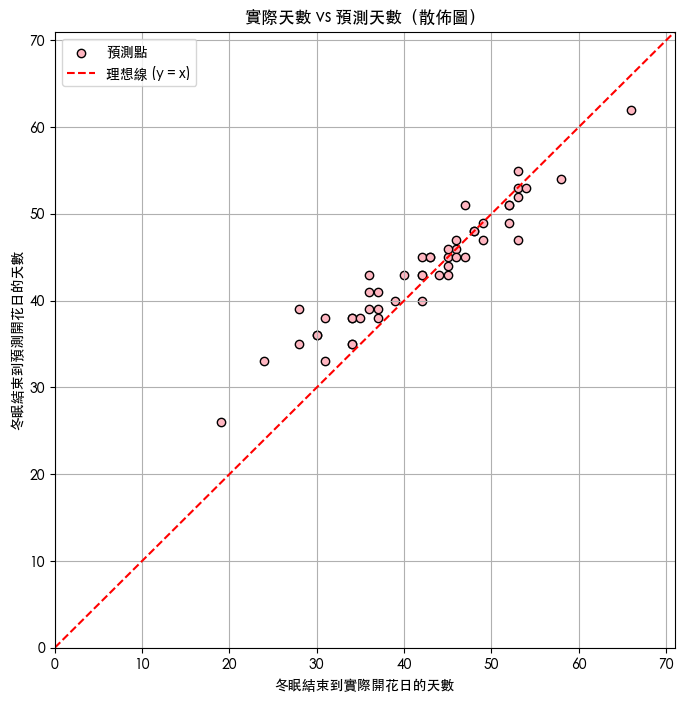

In [67]:
# Áï´Êï£‰ΩàÂúñ
plt.figure(figsize=(8,8))
plt.scatter(actual_bloom_days, bloom_days_per_ea[target_idx], color='lightpink', edgecolor='black', label='È†êÊ∏¨Èªû')

# Áï´ÁêÜÊÉ≥Á∑ö y = x
max_day = max(max(actual_bloom_days), max(bloom_days_per_ea[target_idx])) + 5
plt.plot([0, max_day], [0, max_day], 'r--', label='ÁêÜÊÉ≥Á∑ö (y = x)')

# Ê®ôÈ°åËàáÂ∫ßÊ®ô
plt.xlabel('ÂÜ¨Áú†ÁµêÊùüÂà∞ÂØ¶ÈöõÈñãËä±Êó•ÁöÑÂ§©Êï∏')
plt.ylabel('ÂÜ¨Áú†ÁµêÊùüÂà∞È†êÊ∏¨ÈñãËä±Êó•ÁöÑÂ§©Êï∏')
plt.title('ÂØ¶ÈöõÂ§©Êï∏ vs È†êÊ∏¨Â§©Êï∏ÔºàÊï£‰ΩàÂúñÔºâ')
plt.legend()
plt.grid(True)
plt.xlim(0, max_day)
plt.ylim(0, max_day)
plt.savefig('ÂØ¶ÈöõÂ§©Êï∏ vs È†êÊ∏¨Â§©Êï∏ÔºàE=20Ôºâ', dpi=300, bbox_inches='tight')
plt.show()

In [68]:
# ÊâæÂà∞ Ea=30 Âú® ea_range ‰∏≠ÁöÑ‰ΩçÁΩÆ
target_ea = 30
target_idx = ea_range.index(target_ea)  # ÊâæÂà∞Ea=40ÊòØÁ¨¨ÂπæÂÄã

# Êü•Áúã Ea=30 ÁöÑÊé®‰º∞ vs ÁúüÂØ¶ÁµêÊûú
for year_idx in range(len(actual_bloom_days)):
    print(f"Year {train_allyears_dj_days.iloc[year_idx]['Âπ¥']}: Êé®‰º∞Â§©Êï∏ = {bloom_days_per_ea[target_idx][year_idx]}, ÂØ¶ÈöõÂ§©Êï∏ = {actual_bloom_days[year_idx]}, Ë™§Â∑Æ = {bloom_days_per_ea[target_idx][year_idx] - actual_bloom_days[year_idx]}")

Year 1961: Êé®‰º∞Â§©Êï∏ = 53, ÂØ¶ÈöõÂ§©Êï∏ = 52, Ë™§Â∑Æ = 1
Year 1962: Êé®‰º∞Â§©Êï∏ = 50, ÂØ¶ÈöõÂ§©Êï∏ = 49, Ë™§Â∑Æ = 1
Year 1963: Êé®‰º∞Â§©Êï∏ = 54, ÂØ¶ÈöõÂ§©Êï∏ = 53, Ë™§Â∑Æ = 1
Year 1964: Êé®‰º∞Â§©Êï∏ = 54, ÂØ¶ÈöõÂ§©Êï∏ = 53, Ë™§Â∑Æ = 1
Year 1965: Êé®‰º∞Â§©Êï∏ = 60, ÂØ¶ÈöõÂ§©Êï∏ = 53, Ë™§Â∑Æ = 7
Year 1966: Êé®‰º∞Â§©Êï∏ = 35, ÂØ¶ÈöõÂ§©Êï∏ = 34, Ë™§Â∑Æ = 1
Year 1967: Êé®‰º∞Â§©Êï∏ = 45, ÂØ¶ÈöõÂ§©Êï∏ = 47, Ë™§Â∑Æ = -2
Year 1968: Êé®‰º∞Â§©Êï∏ = 43, ÂØ¶ÈöõÂ§©Êï∏ = 45, Ë™§Â∑Æ = -2
Year 1969: Êé®‰º∞Â§©Êï∏ = 47, ÂØ¶ÈöõÂ§©Êï∏ = 53, Ë™§Â∑Æ = -6
Year 1970: Êé®‰º∞Â§©Êï∏ = 59, ÂØ¶ÈöõÂ§©Êï∏ = 58, Ë™§Â∑Æ = 1
Year 1971: Êé®‰º∞Â§©Êï∏ = 46, ÂØ¶ÈöõÂ§©Êï∏ = 46, Ë™§Â∑Æ = 0
Year 1972: Êé®‰º∞Â§©Êï∏ = 43, ÂØ¶ÈöõÂ§©Êï∏ = 42, Ë™§Â∑Æ = 1
Year 1973: Êé®‰º∞Â§©Êï∏ = 46, ÂØ¶ÈöõÂ§©Êï∏ = 45, Ë™§Â∑Æ = 1
Year 1974: Êé®‰º∞Â§©Êï∏ = 52, ÂØ¶ÈöõÂ§©Êï∏ = 52, Ë™§Â∑Æ = 0
Year 1975: Êé®‰º∞Â§©Êï∏ = 54, ÂØ¶ÈöõÂ§©Êï∏ = 47, Ë™§Â∑Æ = 7
Year 1976: Êé®‰º∞Â§©Êï∏ = 41, ÂØ¶ÈöõÂ§©Êï∏ = 37, Ë™§Â∑Æ = 4
Year 1977: Êé®‰º∞Â§©Êï∏ = 43, ÂØ¶ÈöõÂ

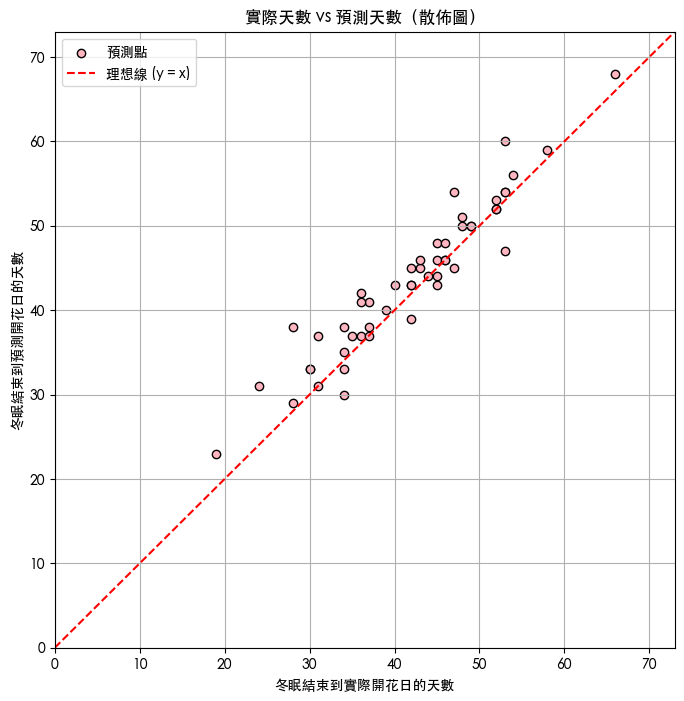

In [69]:
# Áï´Êï£‰ΩàÂúñ
plt.figure(figsize=(8,8))
plt.scatter(actual_bloom_days, bloom_days_per_ea[target_idx], color='lightpink', edgecolor='black', label='È†êÊ∏¨Èªû')

# Áï´ÁêÜÊÉ≥Á∑ö y = x
max_day = max(max(actual_bloom_days), max(bloom_days_per_ea[target_idx])) + 5
plt.plot([0, max_day], [0, max_day], 'r--', label='ÁêÜÊÉ≥Á∑ö (y = x)')

# Ê®ôÈ°åËàáÂ∫ßÊ®ô
plt.xlabel('ÂÜ¨Áú†ÁµêÊùüÂà∞ÂØ¶ÈöõÈñãËä±Êó•ÁöÑÂ§©Êï∏')
plt.ylabel('ÂÜ¨Áú†ÁµêÊùüÂà∞È†êÊ∏¨ÈñãËä±Êó•ÁöÑÂ§©Êï∏')
plt.title('ÂØ¶ÈöõÂ§©Êï∏ vs È†êÊ∏¨Â§©Êï∏ÔºàÊï£‰ΩàÂúñÔºâ')
plt.legend()
plt.grid(True)
plt.xlim(0, max_day)
plt.ylim(0, max_day)
plt.savefig('ÂØ¶ÈöõÂ§©Êï∏ vs È†êÊ∏¨Â§©Êï∏ÔºàE=30Ôºâ', dpi=300, bbox_inches='tight')
plt.show()

In [70]:
# ÊâæÂà∞ Ea=35 Âú® ea_range ‰∏≠ÁöÑ‰ΩçÁΩÆ
target_ea = 35
target_idx = ea_range.index(target_ea)  # ÊâæÂà∞Ea=40ÊòØÁ¨¨ÂπæÂÄã

# Êü•Áúã Ea=35 ÁöÑÊé®‰º∞ vs ÁúüÂØ¶ÁµêÊûú
for year_idx in range(len(actual_bloom_days)):
    print(f"Year {train_allyears_dj_days.iloc[year_idx]['Âπ¥']}: Êé®‰º∞Â§©Êï∏ = {bloom_days_per_ea[target_idx][year_idx]}, ÂØ¶ÈöõÂ§©Êï∏ = {actual_bloom_days[year_idx]}, Ë™§Â∑Æ = {bloom_days_per_ea[target_idx][year_idx] - actual_bloom_days[year_idx]}")

Year 1961: Êé®‰º∞Â§©Êï∏ = 54, ÂØ¶ÈöõÂ§©Êï∏ = 52, Ë™§Â∑Æ = 2
Year 1962: Êé®‰º∞Â§©Êï∏ = 51, ÂØ¶ÈöõÂ§©Êï∏ = 49, Ë™§Â∑Æ = 2
Year 1963: Êé®‰º∞Â§©Êï∏ = 54, ÂØ¶ÈöõÂ§©Êï∏ = 53, Ë™§Â∑Æ = 1
Year 1964: Êé®‰º∞Â§©Êï∏ = 54, ÂØ¶ÈöõÂ§©Êï∏ = 53, Ë™§Â∑Æ = 1
Year 1965: Êé®‰º∞Â§©Êï∏ = 61, ÂØ¶ÈöõÂ§©Êï∏ = 53, Ë™§Â∑Æ = 8
Year 1966: Êé®‰º∞Â§©Êï∏ = 34, ÂØ¶ÈöõÂ§©Êï∏ = 34, Ë™§Â∑Æ = 0
Year 1967: Êé®‰º∞Â§©Êï∏ = 45, ÂØ¶ÈöõÂ§©Êï∏ = 47, Ë™§Â∑Æ = -2
Year 1968: Êé®‰º∞Â§©Êï∏ = 42, ÂØ¶ÈöõÂ§©Êï∏ = 45, Ë™§Â∑Æ = -3
Year 1969: Êé®‰º∞Â§©Êï∏ = 47, ÂØ¶ÈöõÂ§©Êï∏ = 53, Ë™§Â∑Æ = -6
Year 1970: Êé®‰º∞Â§©Êï∏ = 59, ÂØ¶ÈöõÂ§©Êï∏ = 58, Ë™§Â∑Æ = 1
Year 1971: Êé®‰º∞Â§©Êï∏ = 46, ÂØ¶ÈöõÂ§©Êï∏ = 46, Ë™§Â∑Æ = 0
Year 1972: Êé®‰º∞Â§©Êï∏ = 43, ÂØ¶ÈöõÂ§©Êï∏ = 42, Ë™§Â∑Æ = 1
Year 1973: Êé®‰º∞Â§©Êï∏ = 46, ÂØ¶ÈöõÂ§©Êï∏ = 45, Ë™§Â∑Æ = 1
Year 1974: Êé®‰º∞Â§©Êï∏ = 53, ÂØ¶ÈöõÂ§©Êï∏ = 52, Ë™§Â∑Æ = 1
Year 1975: Êé®‰º∞Â§©Êï∏ = 55, ÂØ¶ÈöõÂ§©Êï∏ = 47, Ë™§Â∑Æ = 8
Year 1976: Êé®‰º∞Â§©Êï∏ = 41, ÂØ¶ÈöõÂ§©Êï∏ = 37, Ë™§Â∑Æ = 4
Year 1977: Êé®‰º∞Â§©Êï∏ = 42, ÂØ¶ÈöõÂ

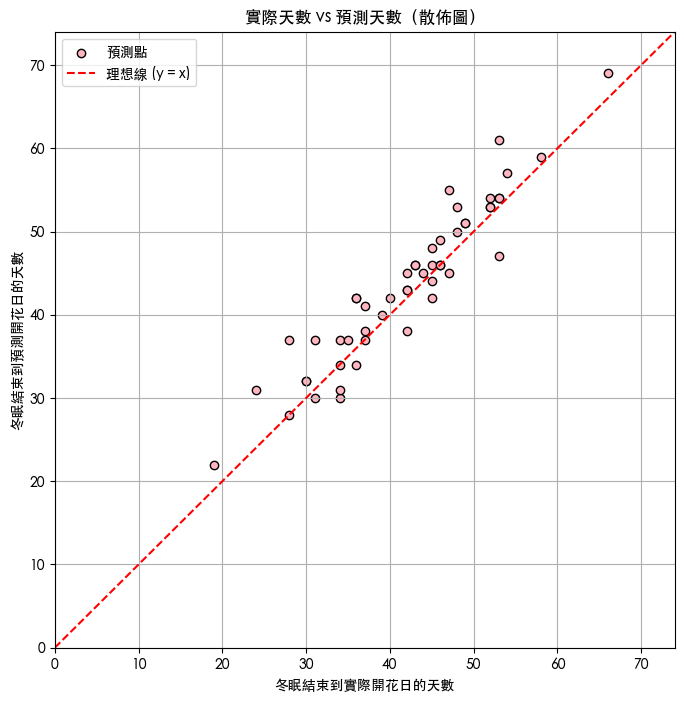

In [71]:
# Áï´Êï£‰ΩàÂúñ
plt.figure(figsize=(8,8))
plt.scatter(actual_bloom_days, bloom_days_per_ea[target_idx], color='lightpink', edgecolor='black', label='È†êÊ∏¨Èªû')

# Áï´ÁêÜÊÉ≥Á∑ö y = x
max_day = max(max(actual_bloom_days), max(bloom_days_per_ea[target_idx])) + 5
plt.plot([0, max_day], [0, max_day], 'r--', label='ÁêÜÊÉ≥Á∑ö (y = x)')

# Ê®ôÈ°åËàáÂ∫ßÊ®ô
plt.xlabel('ÂÜ¨Áú†ÁµêÊùüÂà∞ÂØ¶ÈöõÈñãËä±Êó•ÁöÑÂ§©Êï∏')
plt.ylabel('ÂÜ¨Áú†ÁµêÊùüÂà∞È†êÊ∏¨ÈñãËä±Êó•ÁöÑÂ§©Êï∏')
plt.title('ÂØ¶ÈöõÂ§©Êï∏ vs È†êÊ∏¨Â§©Êï∏ÔºàÊï£‰ΩàÂúñÔºâ')
plt.legend()
plt.grid(True)
plt.xlim(0, max_day)
plt.ylim(0, max_day)
plt.savefig('ÂØ¶ÈöõÂ§©Êï∏ vs È†êÊ∏¨Â§©Êï∏ÔºàE=35Ôºâ', dpi=300, bbox_inches='tight')
plt.show()

In [72]:
# ÊâæÂà∞ Ea=40 Âú® ea_range ‰∏≠ÁöÑ‰ΩçÁΩÆ
target_ea = 40
target_idx = ea_range.index(target_ea)  # ÊâæÂà∞Ea=40ÊòØÁ¨¨ÂπæÂÄã

# Êü•Áúã Ea=40 ÁöÑÊé®‰º∞ vs ÁúüÂØ¶ÁµêÊûú
for year_idx in range(len(actual_bloom_days)):
    print(f"Year {train_allyears_dj_days.iloc[year_idx]['Âπ¥']}: Êé®‰º∞Â§©Êï∏ = {bloom_days_per_ea[target_idx][year_idx]}, ÂØ¶ÈöõÂ§©Êï∏ = {actual_bloom_days[year_idx]}, Ë™§Â∑Æ = {bloom_days_per_ea[target_idx][year_idx] - actual_bloom_days[year_idx]}")

Year 1961: Êé®‰º∞Â§©Êï∏ = 54, ÂØ¶ÈöõÂ§©Êï∏ = 52, Ë™§Â∑Æ = 2
Year 1962: Êé®‰º∞Â§©Êï∏ = 51, ÂØ¶ÈöõÂ§©Êï∏ = 49, Ë™§Â∑Æ = 2
Year 1963: Êé®‰º∞Â§©Êï∏ = 54, ÂØ¶ÈöõÂ§©Êï∏ = 53, Ë™§Â∑Æ = 1
Year 1964: Êé®‰º∞Â§©Êï∏ = 54, ÂØ¶ÈöõÂ§©Êï∏ = 53, Ë™§Â∑Æ = 1
Year 1965: Êé®‰º∞Â§©Êï∏ = 63, ÂØ¶ÈöõÂ§©Êï∏ = 53, Ë™§Â∑Æ = 10
Year 1966: Êé®‰º∞Â§©Êï∏ = 33, ÂØ¶ÈöõÂ§©Êï∏ = 34, Ë™§Â∑Æ = -1
Year 1967: Êé®‰º∞Â§©Êï∏ = 45, ÂØ¶ÈöõÂ§©Êï∏ = 47, Ë™§Â∑Æ = -2
Year 1968: Êé®‰º∞Â§©Êï∏ = 41, ÂØ¶ÈöõÂ§©Êï∏ = 45, Ë™§Â∑Æ = -4
Year 1969: Êé®‰º∞Â§©Êï∏ = 47, ÂØ¶ÈöõÂ§©Êï∏ = 53, Ë™§Â∑Æ = -6
Year 1970: Êé®‰º∞Â§©Êï∏ = 60, ÂØ¶ÈöõÂ§©Êï∏ = 58, Ë™§Â∑Æ = 2
Year 1971: Êé®‰º∞Â§©Êï∏ = 46, ÂØ¶ÈöõÂ§©Êï∏ = 46, Ë™§Â∑Æ = 0
Year 1972: Êé®‰º∞Â§©Êï∏ = 43, ÂØ¶ÈöõÂ§©Êï∏ = 42, Ë™§Â∑Æ = 1
Year 1973: Êé®‰º∞Â§©Êï∏ = 47, ÂØ¶ÈöõÂ§©Êï∏ = 45, Ë™§Â∑Æ = 2
Year 1974: Êé®‰º∞Â§©Êï∏ = 54, ÂØ¶ÈöõÂ§©Êï∏ = 52, Ë™§Â∑Æ = 2
Year 1975: Êé®‰º∞Â§©Êï∏ = 56, ÂØ¶ÈöõÂ§©Êï∏ = 47, Ë™§Â∑Æ = 9
Year 1976: Êé®‰º∞Â§©Êï∏ = 42, ÂØ¶ÈöõÂ§©Êï∏ = 37, Ë™§Â∑Æ = 5
Year 1977: Êé®‰º∞Â§©Êï∏ = 42, ÂØ¶Èö

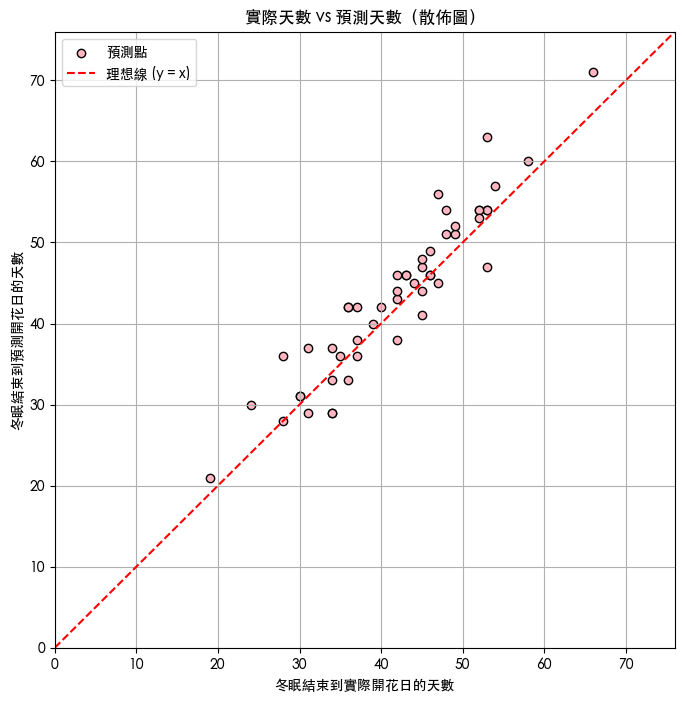

In [73]:
# Áï´Êï£‰ΩàÂúñ
plt.figure(figsize=(8,8))
plt.scatter(actual_bloom_days, bloom_days_per_ea[target_idx], color='lightpink', edgecolor='black', label='È†êÊ∏¨Èªû')

# Áï´ÁêÜÊÉ≥Á∑ö y = x
max_day = max(max(actual_bloom_days), max(bloom_days_per_ea[target_idx])) + 5
plt.plot([0, max_day], [0, max_day], 'r--', label='ÁêÜÊÉ≥Á∑ö (y = x)')

# Ê®ôÈ°åËàáÂ∫ßÊ®ô
plt.xlabel('ÂÜ¨Áú†ÁµêÊùüÂà∞ÂØ¶ÈöõÈñãËä±Êó•ÁöÑÂ§©Êï∏')
plt.ylabel('ÂÜ¨Áú†ÁµêÊùüÂà∞È†êÊ∏¨ÈñãËä±Êó•ÁöÑÂ§©Êï∏')
plt.title('ÂØ¶ÈöõÂ§©Êï∏ vs È†êÊ∏¨Â§©Êï∏ÔºàÊï£‰ΩàÂúñÔºâ')
plt.legend()
plt.grid(True)
plt.xlim(0, max_day)
plt.ylim(0, max_day)
plt.savefig('ÂØ¶ÈöõÂ§©Êï∏ vs È†êÊ∏¨Â§©Êï∏ÔºàE=40Ôºâ', dpi=300, bbox_inches='tight')
plt.show()

### ‰ΩøÁî®Ê∏¨Ë©¶ÈõÜ‰æÜÈ©óË≠âÊ¥ªÂåñËÉΩÂú® Ea = 26ÊôÇÁöÑÈ†êÊ∏¨Ê∫ñÁ¢∫Â∫¶

In [75]:
testyears = sorted(test_dj_dict.keys())

def get_actual_bloom_days(test):
    actual_bloom_days = []
    
    for year in testyears:
        # ÊâæÈÄô‰∏ÄÂπ¥ÁöÑÈñãËä±Êó•
        blossom_row = test[(test["Âπ¥"] == year) & (test["ÈñãËä±Êó•"] == 1)]
        
        if blossom_row.empty:
            # Â¶ÇÊûúÈÄôÂπ¥Ê≤íÊúâË≥áÊñôÔºåÂ∞±Ë∑≥ÈÅé
            continue

        month = int(blossom_row["Êúà"].values[0])
        day = int(blossom_row["Êó•"].values[0])
        
        # Ë®àÁÆóÈÄô‰∏ÄÂ§©ÊòØÈÇ£‰∏ÄÂπ¥ÁöÑÁ¨¨ÂπæÂ§©
        base_date = datetime.date(year, 1, 1)
        bloom_date = datetime.date(year, month, day)
        actual_day = (bloom_date - base_date).days + 1
        
        actual_bloom_days.append(actual_day)

    return testyears, actual_bloom_days

In [76]:
testyears, actual_bloom_days = get_actual_bloom_days(test)

for year, bloom_day in zip(testyears, actual_bloom_days):
    print(f'{year}Âπ¥ÁöÑÈñãËä±Êó•ÊòØÁ¨¨{bloom_day}Â§©')

2012Âπ¥ÁöÑÈñãËä±Êó•ÊòØÁ¨¨91Â§©
2013Âπ¥ÁöÑÈñãËä±Êó•ÊòØÁ¨¨75Â§©
2014Âπ¥ÁöÑÈñãËä±Êó•ÊòØÁ¨¨84Â§©
2015Âπ¥ÁöÑÈñãËä±Êó•ÊòØÁ¨¨82Â§©
2016Âπ¥ÁöÑÈñãËä±Êó•ÊòØÁ¨¨81Â§©
2017Âπ¥ÁöÑÈñãËä±Êó•ÊòØÁ¨¨80Â§©
2018Âπ¥ÁöÑÈñãËä±Êó•ÊòØÁ¨¨76Â§©
2019Âπ¥ÁöÑÈñãËä±Êó•ÊòØÁ¨¨80Â§©
2020Âπ¥ÁöÑÈñãËä±Êó•ÊòØÁ¨¨74Â§©
2021Âπ¥ÁöÑÈñãËä±Êó•ÊòØÁ¨¨73Â§©
2022Âπ¥ÁöÑÈñãËä±Êó•ÊòØÁ¨¨79Â§©
2023Âπ¥ÁöÑÈñãËä±Êó•ÊòØÁ¨¨73Â§©
2024Âπ¥ÁöÑÈñãËä±Êó•ÊòØÁ¨¨89Â§©


In [140]:
# ÂÖàËΩâÊèõÊàê Kelvin
test['avg_temp_kelvin'] = test['Âπ≥ÂùáÊ∞£Ê∫´'] + 273.15

# ÂÑ≤Â≠òÈ†êÊ∏¨ÁµêÊûú
predicted_bloom_dates = []
actual_bloom_dates = []
prediction_errors = []
years_list = []

# Áî® test_allyears_dj_days ÁöÑÊØè‰∏ÄÂπ¥Ë∑ë
for idx, row in test_allyears_dj_days.iterrows():
    year = row['Âπ¥']
    wake_up_date = row['ÂÜ¨Áú†ÁµêÊùüÊó•']  # Ê≥®ÊÑèÈÄôË£°ÊòØÂÜ¨Áú†ÁµêÊùüÊó•ÔºåÂ∑≤Á∂ìÊòØ datetime.date ÂûãÊÖã‰∫Ü

    # ÊâæÂà∞ÂÜ¨Áú†ÁµêÊùüÊó•ÁöÑindex
    start_row = test[
        (test['Âπ¥'] == wake_up_date.year) &
        (test['Êúà'] == wake_up_date.month) &
        (test['Êó•'] == wake_up_date.day)
    ]
    if start_row.empty:
        continue

    start_idx = start_row.index[0]
    accumulated_DTS = 0
    current_idx = start_idx

    # Áî®ÊúÄ‰Ω≥ÁöÑ best_ea Âíå best_dtsm Á¥ØÁ©çDTS
    while accumulated_DTS <= best_dtsm:
        if current_idx >= len(test):
            break

        temp_celsius = test.loc[current_idx, 'Âπ≥ÂùáÊ∞£Ê∫´']
        temp_kelvin = temp_celsius + 273.15
        exp_val = np.exp((best_ea * (temp_kelvin - Ts)) / (temp_kelvin * Ts * R))
        accumulated_DTS += exp_val

        current_idx += 1

    bloom_idx = current_idx

    # È†êÊ∏¨ÈñãËä±Êó•
    estimated_bloom_date = datetime.date(
        test.loc[bloom_idx, 'Âπ¥'],
        test.loc[bloom_idx, 'Êúà'],
        test.loc[bloom_idx, 'Êó•']
    )

    # ---------
    # ÊâæÂØ¶ÈöõÈñãËä±Êó•
    blossom_row = test[(test['Âπ¥'] == year) & (test['ÈñãËä±Êó•'] == 1)]
    if blossom_row.empty:
        continue

    blossom_idx = blossom_row.index[0]
    real_bloom_date = datetime.date(
        test.loc[blossom_idx, 'Âπ¥'],
        test.loc[blossom_idx, 'Êúà'],
        test.loc[blossom_idx, 'Êó•']
    )

    # ---------
    # Ë®òÈåÑÁµêÊûú
    years_list.append(year)
    predicted_bloom_dates.append(estimated_bloom_date)
    actual_bloom_dates.append(real_bloom_date)
    prediction_errors.append(abs((real_bloom_date - estimated_bloom_date).days))

# ----------------------------
# Êï¥ÁêÜÊàê DataFrame
result_df = pd.DataFrame({
    'Âπ¥': years_list,
    'ÂØ¶ÈöõÈñãËä±Êó•': actual_bloom_dates,
    'È†êÊ∏¨ÈñãËä±Êó•': predicted_bloom_dates,
    'Ë™§Â∑ÆÂ§©Êï∏': prediction_errors
})

# È°ØÁ§∫È†êÊ∏¨ÁµêÊûú
result_df

Âπ¥       ÂØ¶ÈöõÈñãËä±Êó•       È†êÊ∏¨ÈñãËä±Êó•  Ë™§Â∑ÆÂ§©Êï∏
0   2012  2012-03-31  2012-03-31     0
1   2013  2013-03-16  2013-03-19     3
2   2014  2014-03-25  2014-03-27     2
3   2015  2015-03-23  2015-03-28     5
4   2016  2016-03-21  2016-03-24     3
5   2017  2017-03-21  2017-03-30     9
6   2018  2018-03-17  2018-03-24     7
7   2019  2019-03-21  2019-03-22     1
8   2020  2020-03-14  2020-03-23     9
9   2021  2021-03-14  2021-03-23     9
10  2022  2022-03-20  2022-03-23     3
11  2023  2023-03-14  2023-03-19     5
12  2024  2024-03-29  2024-03-28     1

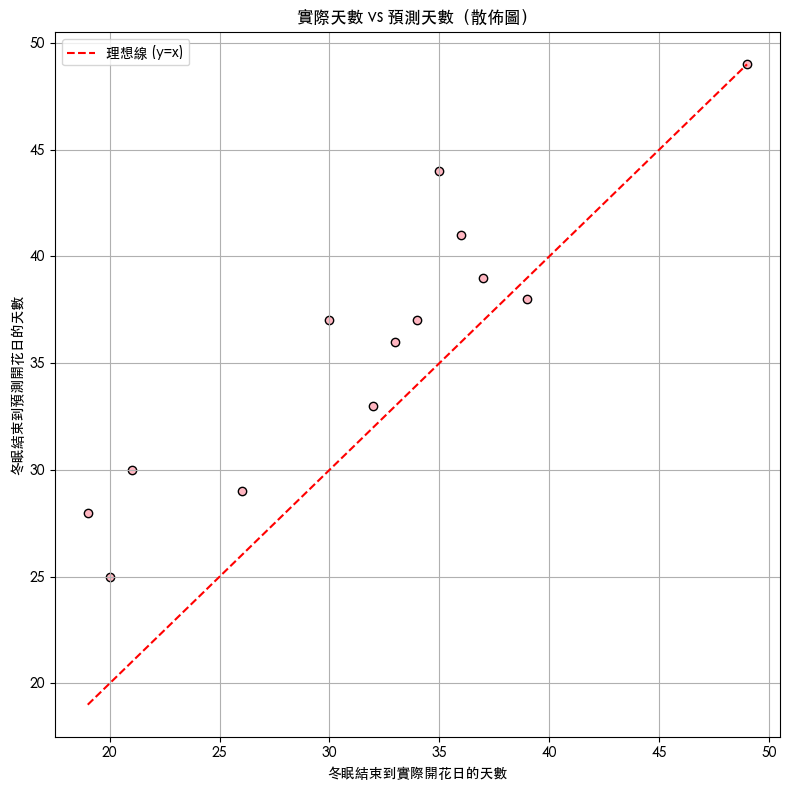

In [136]:
plt.figure(figsize=(8, 8))
plt.scatter(actual_bloom_days_test, predicted_bloom_days_test, color='lightpink', edgecolor='black')
plt.plot([min(actual_bloom_days_test), max(actual_bloom_days_test)],
         [min(actual_bloom_days_test), max(actual_bloom_days_test)],
         'r--', label='ÁêÜÊÉ≥Á∑ö (y=x)')

plt.xlabel('ÂÜ¨Áú†ÁµêÊùüÂà∞ÂØ¶ÈöõÈñãËä±Êó•ÁöÑÂ§©Êï∏')
plt.ylabel('ÂÜ¨Áú†ÁµêÊùüÂà∞È†êÊ∏¨ÈñãËä±Êó•ÁöÑÂ§©Êï∏')
plt.title('ÂØ¶ÈöõÂ§©Êï∏ vs È†êÊ∏¨Â§©Êï∏ÔºàÊï£‰ΩàÂúñÔºâ')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('ÂØ¶ÈöõÂ§©Êï∏ vs È†êÊ∏¨Â§©Êï∏ÔºàE=26ÔºâTest', dpi=300, bbox_inches='tight')
plt.show()

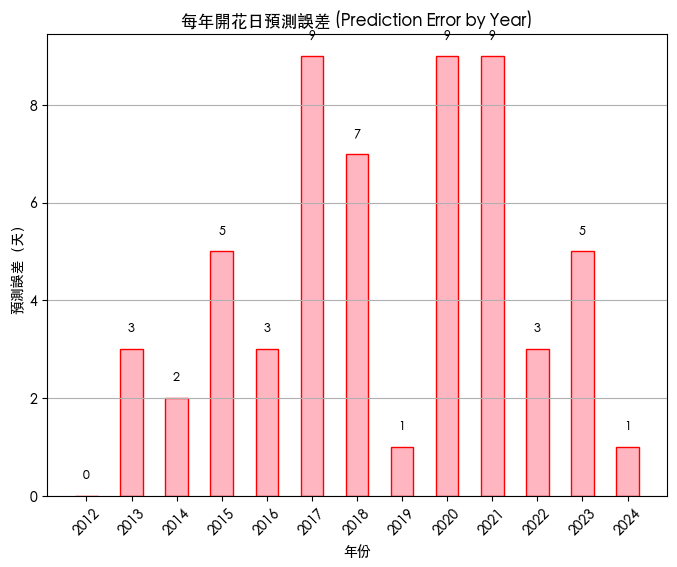

In [134]:
plt.figure(figsize=(8,6))
bars = plt.bar(years_list, prediction_errors, color='lightpink', width=0.5, edgecolor='red')

plt.xlabel('Âπ¥‰ªΩ')
plt.ylabel('È†êÊ∏¨Ë™§Â∑ÆÔºàÂ§©Ôºâ')
plt.title('ÊØèÂπ¥ÈñãËä±Êó•È†êÊ∏¨Ë™§Â∑Æ (Prediction Error by Year)')
plt.xticks(years_list, rotation=45)
plt.grid(axis='y')

# Âä†‰∏äÊØèÊ¢ù‰∏äÈù¢ÁöÑÊï∏ÂÄºÊ®ôÁ±§
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # ÊñáÂ≠óÁöÑxÂ∫ßÊ®ôÔºöÊ¢ù‰∏≠ÂøÉ
        height + 0.3,                      # ÊñáÂ≠óÁöÑyÂ∫ßÊ®ôÔºöÊ¢ù‰∏äÊñπ‰∏ÄÈªû
        f'{height:.0f}',                   # È°ØÁ§∫ÁöÑÊï∏Â≠óÔºàÂèñÊï¥Êï∏Ôºâ
        ha='center', va='bottom', fontsize=9  # ÁΩÆ‰∏≠Â∞çÈΩäÔºåÂ∞èÂ≠óÈ´î
    )
plt.savefig('ÊØèÂπ¥ÈñãËä±Êó•È†êÊ∏¨Ë™§Â∑Æ', dpi=300, bbox_inches='tight')
plt.show()

In [79]:
actual_bloom_days_test = []
predicted_bloom_days_test = []

for idx, row in test_allyears_dj_days.iterrows():
    year = row['Âπ¥']
    wake_up_date = row['ÂÜ¨Áú†ÁµêÊùüÊó•']

    # ÊâæÂà∞È†êÊ∏¨ÈñãËä±Êó•ÂíåÁúüÂØ¶ÈñãËä±Êó•
    predicted_date = predicted_bloom_dates[idx]
    actual_date = actual_bloom_dates[idx]

    # Áõ¥Êé•ÊãøÂÜ¨Áú†ÁµêÊùüÊó•‰æÜÁÆóÂ§©Êï∏
    predicted_days = (predicted_date - wake_up_date).days
    actual_days = (actual_date - wake_up_date).days

    predicted_bloom_days_test.append(predicted_days)
    actual_bloom_days_test.append(actual_days)

# ----------------------------
# Áõ¥Êé•ÁÆó R¬≤ ÂàÜÊï∏
from sklearn.metrics import r2_score

r2 = r2_score(actual_bloom_days_test, predicted_bloom_days_test)
print(f"\nüå∏ Ê∏¨Ë©¶ÈõÜ R¬≤ ÂàÜÊï∏Ôºà‰ª•ÂÜ¨Áú†ÁµêÊùüÊó•ÁÇ∫Âü∫Ê∫ñÔºâÔºö{r2:.4f}")


üå∏ Ê∏¨Ë©¶ÈõÜ R¬≤ ÂàÜÊï∏Ôºà‰ª•ÂÜ¨Áú†ÁµêÊùüÊó•ÁÇ∫Âü∫Ê∫ñÔºâÔºö0.5665
